<h1> Elo Merchant Category Recommendation :</h1>

<h2>Business Problem/Problem Statement :</h2>

> Elo Merchant Category Recommendation is a Kaggle competition which is provided by Elo. As a payment Brand, Elo has built partnerships with merchants in order to offer promotions and discounts to card holders. Basically, These programs make the customer's choice more strongly towards the usage of Elo. But, they want to know, do these promotions actually work for customer and merchant. Elo needs to keep their customers so loyalty of the customers towards the brand is crucial. For Example, a customer using the Elo card with diverse merchants for a long time, this signifies the user's loyalty is high. The Problem is to find a metric which has to reflect the cardholder's loyalty with Elo payment brand.

<h2>Dataset Overview :</h2>

The datasets are largely anonymized, and the meaning of the features are not elaborated. External data is allowed.

The problem has 5 datasets.

> **train.csv :** It has 6 features, first_active_month, card-id, feature1, feature2, feature3 and target

> **test.csv :** The test set has the same features as the train set without targets

> **historical_transactions.csv :** Contains up to 3 months worth of historical transactions for each card_id

> **merchants.csv :** Contains the transactions at new merchants(merchant_ids that this particular card_id has not yet visited) over a period of two months.

> **new_merchant_transactions.csv :** Two months’ worth of data for each card_id containing ALL purchases that card_id made at merchant_ids that were not visited in the historical data

In all these datasets, no text data/feature is present. We only have categorical and numerical features. Additionally, by looking at historical_transactions.csv and new_merchant_transactions.csv, we can find that the historical transactions are the transactions occurred before the "reference date" and new merchant transactions - the ones that occurred after the reference date (according to the 'month_lag' field, which is generously described as "month lag to reference date").

<h2>Mapping the real-world problem to Machine Learning problem :</h2>

> In terms of Machine Learning, we need a metric to measure up the customer's loyalty.A certain loyalty score is assigned for each of the card_id present in train data.

>**Input Features —** Cardholder’s Purchase history, usage time etc.

>**Target Variable —** Loyalty Score

>The Loyalty Score is the target variable for which the Machine Learning Model should be built to predict. **What is loyalty?** According to the Data_Dictionary.xlsx, **loyalty is a numerical score calculated 2 months after historical and evaluation period.** The Loyalty score depends on many aspects of the customers. The purchase history, usage time, merchant’s diversity, etc.  Loyalty scores are real-numbers, It directly gives us the intuition that we have to go for a supervised machine learning regression model to solve this problem where features are as our input in train data and output is real number value which is our predicted loyalty score.

<h2>Real-world constraints :</h2>

> The constraint is that the data which has been provided is not real-customer data. The Provided data is Anonymous and simulated, I think this is due to privacy and legal constraints. Simulated data sometimes has an artificially induced bias which will affect the prediction model performance. We have to deal with this specifically.

<h2>Performance Metric :</h2>

> Root mean square error(RMSE) is used to evaluate our predictions with actual loyalty score. We want our predicted loyalty score close to the actual score. So we need to have a lower RMSE score. This gives us the knowledge that on the basis of input features how close our model makes the predictions as compared to actual predictions.


**Downloading Data :**

In [1]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/10445/200747/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1620215211&Signature=Mt2Std3ijid8ntLwh3anT4DJ2t%2Ba4JzlrlBq29yXAqnwJlCLBWq3qenMV6Pr6QE3ZaWIiZfBFknZQ7EcMNJJtYS2l5GrnCRu68uT%2FPaZSSWoOA4PzOBFMAwnrffU8q%2FRogni4R0j%2B%2FFBGz%2FnrHw%2B2jLG%2F4%2F7gEY%2F7jhrNptqbVJFnLPxAwGWmlU9eGutByplN3A7gfSlbGk5TybkOPPzCG%2F%2B5TSvDmkPzkyNZ3wa84dbsjCLYiSvWFT0I%2FsnazgiVXUKWJUjF6AnQ3NNBYqWrWO2Kjc0s%2F63ZIhr06MvDdbe3C%2BJgCKiL8KV7vffGjyMhq4m1bGSdaD01VyZg0x19w%3D%3D&response-content-disposition=attachment%3B+filename%3Delo-merchant-category-recommendation.zip" -c -O 'elo-merchant-category-recommendation.zip'

--2021-05-02 20:08:46--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/10445/200747/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1620215211&Signature=Mt2Std3ijid8ntLwh3anT4DJ2t%2Ba4JzlrlBq29yXAqnwJlCLBWq3qenMV6Pr6QE3ZaWIiZfBFknZQ7EcMNJJtYS2l5GrnCRu68uT%2FPaZSSWoOA4PzOBFMAwnrffU8q%2FRogni4R0j%2B%2FFBGz%2FnrHw%2B2jLG%2F4%2F7gEY%2F7jhrNptqbVJFnLPxAwGWmlU9eGutByplN3A7gfSlbGk5TybkOPPzCG%2F%2B5TSvDmkPzkyNZ3wa84dbsjCLYiSvWFT0I%2FsnazgiVXUKWJUjF6AnQ3NNBYqWrWO2Kjc0s%2F63ZIhr06MvDdbe3C%2BJgCKiL8KV7vffGjyMhq4m1bGSdaD01VyZg0x19w%3D%3D&response-content-disposition=attachment%3B+filename%3Delo-merchant-category-recommendation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.80, 172.217.164.176, 172.217.9.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 644665605 (615M) [application/zip]
Saving to: ‘elo

**Unzip all the files :**

In [14]:
!unzip elo-merchant-category-recommendation.zip

Archive:  elo-merchant-category-recommendation.zip
  inflating: Data Dictionary.xlsx    
  inflating: Data_Dictionary.xlsx    
  inflating: historical_transactions.csv  
  inflating: merchants.csv           
  inflating: new_merchant_transactions.csv  
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


**Reduce the memory usage :**

In [15]:
# Reference: https://www.kaggle.com/rinnqd/reduce-memory-usage

def reduce_memory_usage(df, verbose=True):
  '''
  This function reduces the memory sizes of dataframe by changing the datatypes of the columns.
  Parameters
  df - DataFrame whose size to be reduced
  verbose - Boolean, to mention the verbose required or not.
  '''
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  start_mem = df.memory_usage().sum() / 1024**2
  for col in df.columns:
      col_type = df[col].dtypes
      if col_type in numerics:
          c_min = df[col].min()
          c_max = df[col].max()
          if str(col_type)[:3] == 'int':
              if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                  df[col] = df[col].astype(np.int8)
              elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                  df[col] = df[col].astype(np.int16)
              elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                  df[col] = df[col].astype(np.int32)
              elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                  df[col] = df[col].astype(np.int64)
          else:
              c_prec = df[col].apply(lambda x: np.finfo(x).precision).max()
              if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max and c_prec == np.finfo(np.float16).precision:
                  df[col] = df[col].astype(np.float16)
              elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max and c_prec == np.finfo(np.float32).precision:
                  df[col] = df[col].astype(np.float32)
              else:
                  df[col] = df[col].astype(np.float64)
  end_mem = df.memory_usage().sum() / 1024**2
  if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
  return df

**Import all the libraries :**

In [4]:
import numpy as np
import pandas as pd
import os
import time
import warnings
import gc
import pickle
import os
import matplotlib
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_style("whitegrid")
import warnings 
warnings.simplefilter("ignore")
from tqdm import tqdm
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Loading Data :**


In [16]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
historical_data = pd.read_csv('/content/historical_transactions.csv')
newmerchant_data = pd.read_csv('/content/new_merchant_transactions.csv')
merchants_data = pd.read_csv('/content/merchants.csv')

**Reduce memory usage of data :**

In [17]:
train_data = reduce_memory_usage(train_data)
test_data = reduce_memory_usage(test_data)
historical_data = reduce_memory_usage(historical_data)
newmerchant_data = reduce_memory_usage(newmerchant_data)
merchants_data = reduce_memory_usage(merchants_data)

Mem. usage decreased to  5.20 Mb (43.7% reduction)
Mem. usage decreased to  2.24 Mb (52.5% reduction)
Mem. usage decreased to 2026.75 Mb (34.8% reduction)
Mem. usage decreased to 136.66 Mb (34.8% reduction)
Mem. usage decreased to 39.90 Mb (29.0% reduction)


<h2>Exploring the train and test data files :</h2>

In [ ]:
# As our first file is excel file we have to read it with the excel command of pandas.
data_dictionary=pd.read_excel('/content/Data Dictionary.xlsx')
data_dictionary

,train.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Unique card identifier
3,first_active_month,"'YYYY-MM', month of first purchase"
4,feature_1,Anonymized card categorical feature
5,feature_2,Anonymized card categorical feature
6,feature_3,Anonymized card categorical feature
7,target,Loyalty numerical score calculated 2 months af...


**Observations :**

* This DataDictionary file have the description of all the features in Description column which were included in train.csv.

* From second row we have columns which have the description of all the columns in our data and third row tell us about the card_id and third one is about the first_active_month which tell us about the month and year of purchase of products.

* feature_1, feature_2, feature_3 has categorical value which is in row fourth,fifth,and sixth.

* last row tells us about the prediction on the basis of these features which is known as target column. or we can say loyalty score which is calculated after the two months.

The number of rows in train_data is: 201917
The number of rows in test_data is: 123623


([<matplotlib.axis.XTick at 0x7fda873bc810>,
 [Text(0, 0, 'train_rows'), Text(0, 0, 'test_rows')])

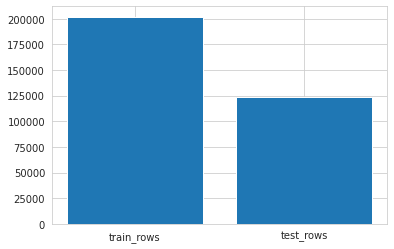

In [ ]:
print('The number of rows in train_data is:',train_data.shape[0])
print('The number of rows in test_data is:',test_data.shape[0])
plt.bar([0,1],[train_data.shape[0],test_data.shape[0]])
plt.xticks([0,1],['train_rows','test_rows'])

In [ ]:
train_data.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [ ]:
test_data.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [ ]:
train_data.info()
print("********************************************************************")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_active_month  201917 non-null  object 
 1   card_id             201917 non-null  object 
 2   feature_1           201917 non-null  int8   
 3   feature_2           201917 non-null  int8   
 4   feature_3           201917 non-null  int8   
 5   target              201917 non-null  float64
dtypes: float64(1), int8(3), object(2)
memory usage: 5.2+ MB
********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   first_active_month  123622 non-null  object
 1   card_id             123623 non-null  object
 2   feature_1           123623 non-null  int8  
 3   

**Obsaervations :**

* The main data train has 6 values. 'first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3', 'target'.
* first_active_month : This is active_month for card_id. 
* feature_1,2,3 : it is key important but hidden meaning.
* target : Loyalty numerical score calculated 2 months after historical and evaluation period
* We can infer that both the data have same columns and overall same structure. So, We will explore both data simultaneously.


**Missing values in train and test data :
(Check for nan values in the whole train and test data)**

In [ ]:
train_data.isna().any()

first_active_month    False
card_id               False
feature_1             False
feature_2             False
feature_3             False
target                False
dtype: bool

**Observation :** In train Data there is no nan values for any features in train data

In [ ]:
test_data.isna().any()

first_active_month     True
card_id               False
feature_1             False
feature_2             False
feature_3             False
dtype: bool

In [ ]:
test_data[test_data['first_active_month'].isna()]

,first_active_month,card_id,feature_1,feature_2,feature_3
11578,NaN,C_ID_c27b4f80f7,5,2,1


**Observation :**
In the Test Data, there is one row with 'first_active_month' as nan value. Since it is test data we have to impute the value.

**Feature comparison in train and test data features :**

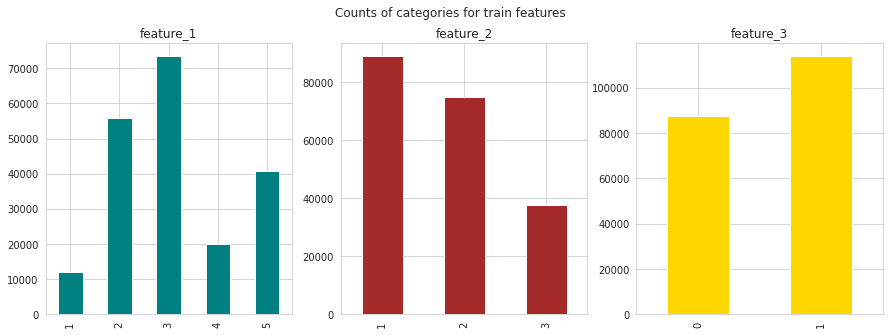

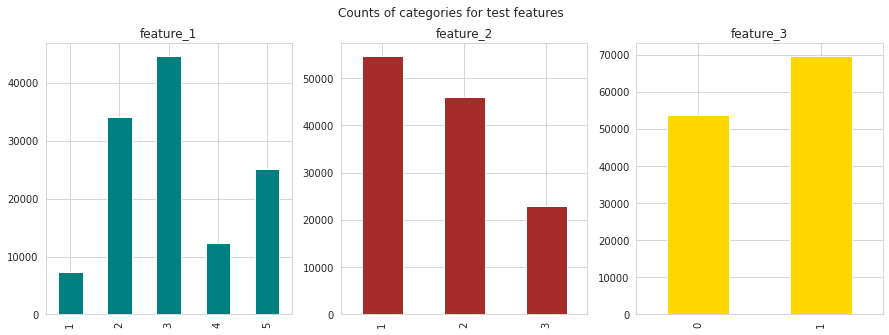

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5));
train_data['feature_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='feature_1');
train_data['feature_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='feature_2');
train_data['feature_3'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='feature_3');
plt.suptitle('Counts of categories for train features');

fig, ax = plt.subplots(1, 3, figsize = (15, 5));
test_data['feature_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='feature_1');
test_data['feature_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='feature_2');
test_data['feature_3'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='feature_3');
plt.suptitle('Counts of categories for test features');

**Observations :**

* We can see from above plots that test and train data are distributed similarly.
* feature_1, feature_2, feature_3, all are categorical variables
* feature_1 has 5 unique values
* feature_2 has 3 unique values
* feature_3 is a binary column

**Anonymised Features Analysis : feature_1, feature_2, feature_3**

**checking distributions with target :**

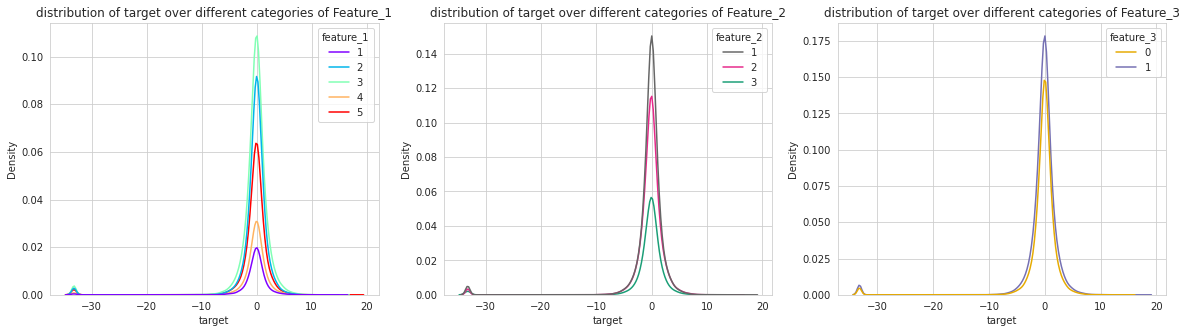

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.kdeplot(x ='target',data = train_data,hue = 'feature_1',palette='rainbow')
plt.title('distribution of target over different categories of Feature_1')
plt.subplot(132)
sns.kdeplot(x ='target',data = train_data,hue = 'feature_2',palette='Dark2_r')
plt.title('distribution of target over different categories of Feature_2')
plt.subplot(133)
sns.kdeplot(x ='target',data = train_data,hue = 'feature_3',palette='Dark2_r')
plt.title('distribution of target over different categories of Feature_3')
plt.show()

**Observations :** 

The above two plots show a key point : 

* while different categories of these features could have various counts, the distribution of target is almost the same. This could mean, that these features aren't really good at predicting target - we'll need other features and feature engineering. Also it is worth noticing that mean target values of each catogory of these features is near zero. This could mean that data was sampled from normal distribution.

**Note:** The same information can be gathered by using box-plot and violin-plot, I have tried all of them. Here, I use kdeplot as I found it more visually appealing. In further analysis I have used Box-plot more often.

**let's see Target column seperately :**

In [ ]:
train_data['target'].describe()

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

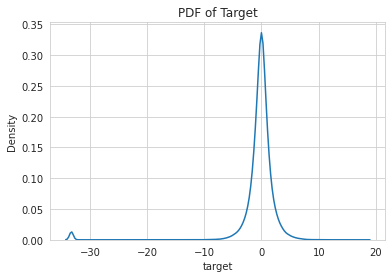

In [ ]:
# Plotting the pdf of target variable
sns.kdeplot(train_data['target'])
plt.title("PDF of Target")
plt.show()

**Observation:** The target value is almost normally distributed with bunch of outlier value near -30. This distribution indicates that the target value is normalized with pre-decided mean and standard deviation.

This outlier value of the target is a value which needs more look into the feature EDA to understand cause of it.

**Analyze the outliers :**



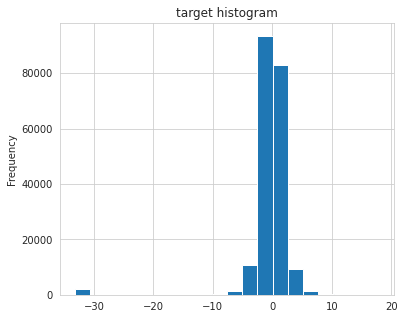

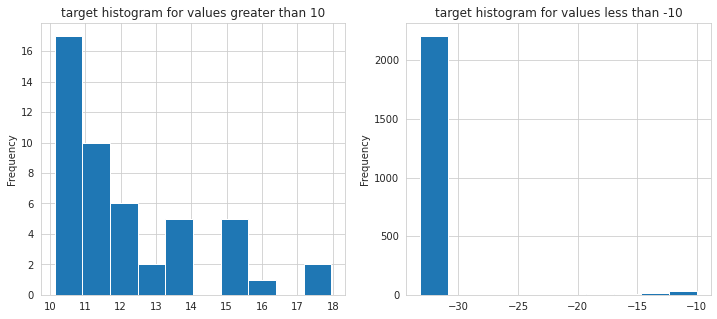

In [ ]:
loyality_score = train_data['target']
ax = loyality_score.plot.hist(bins=20, figsize=(6, 5))
_ = ax.set_title("target histogram")
plt.show()

fig, axs = plt.subplots(1,2, figsize=(12, 5))
_ = loyality_score[loyality_score > 10].plot.hist(ax=axs[0])
_ = axs[0].set_title("target histogram for values greater than 10")
_ = loyality_score[loyality_score < -10].plot.hist(ax=axs[1])
_ = axs[1].set_title("target histogram for values less than -10")
plt.show()

**Observations :**

* Values range from -33.2 to 17.9

* -33 seems like an outlier as can be seen in the 3rd plot

* other values less than -10 also seem like outliers due to very less in number

* All values above 10 are also looking like outliers

In [ ]:
target_sign = loyality_score.apply(lambda x: 0 if x <= 0 else 1)
target_sign.value_counts()

0    104308
1     97609
Name: target, dtype: int64

**Observation :** Negative and positive target values are almost in the same proportion

In [ ]:
outliers_in_target= train_data.loc[(train_data['target']< -10) | (train_data['target']>10)]
print(' The number of outliers in the data is:',outliers_in_target.shape[0])
non_outliers_in_target= train_data.loc[(train_data['target'] >=-10) & (train_data['target']<=10)]
print(' The number of non-outliers in the data is:',non_outliers_in_target.shape[0])

 The number of outliers in the data is: 2312
 The number of non-outliers in the data is: 199605


Outliers comparison with the feature of target :

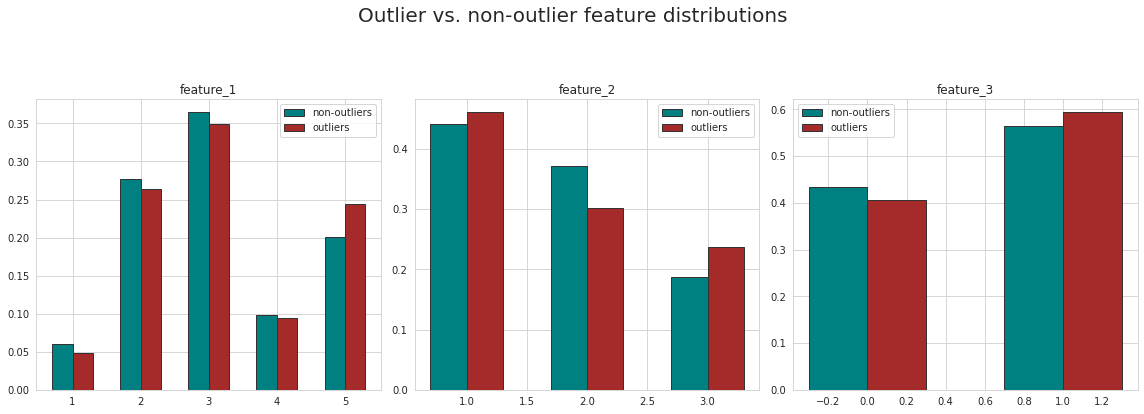

In [ ]:
plt.figure(figsize=[16,9])
plt.suptitle('Outlier vs. non-outlier feature distributions', fontsize=20, y=1.1)

for num, col in enumerate(['feature_1', 'feature_2', 'feature_3', 'target']):
    if col is not 'target':
        plt.subplot(2, 3, num+1)
        non_outlier = non_outliers_in_target[col].value_counts() / non_outliers_in_target.shape[0]
        plt.bar(non_outlier.index, non_outlier, label=('non-outliers'), align='edge', width=-0.3, edgecolor=[0.2]*3,color=['teal'])
        outlier = outliers_in_target[col].value_counts() / outliers_in_target.shape[0]
        plt.bar(outlier.index, outlier, label=('outliers'), align='edge', width=0.3, edgecolor=[0.2]*3,color=['brown'])
        plt.title(col)
        plt.legend()

plt.tight_layout()
plt.show()

**Observations :**

* We can see there are only slight differences between outliers and non-outliers, but they don't seem to be that big and they certainly can't explain the difference between the target values, at least based on the features in the train dataset. It means the card_id's having outliers as loyalty score having pretty much similar properties to the regular ones.

* Outliers could be one of the main purposes of this competition. May be those represent fraud or credit default etc. i.e. they are important. The target variable is normally distributed, and outliers seem to be purposely introduced in the loyalty formula. 

* As noted in multiple threads over kaggle, more than half of the RMSE is due to the outliers with loyalty scores of ~ -33. They strongly mention, If we try to replace these outliers with the median, retrain the model and submit, we will
find our leaderboard score WORSE than if we keep the outliers at their original values. Impute any values will significantly affect the RMSE score for test set. So, imputations have been excluded. This tells us that outliers are included in the test set. Furthermore, given the magnitude of the impact of outliers on the RMSE score, Our focus should be on predicting those outliers as accurately as possible.

* For mitigating the impact of outliers, We can make the outliers as a binary feature whether card's target value is outliers or not. So that while training our model can learn that given entry has target score as outlier or not and use this information while predicting loyalty score.

**Analysis of feature First_active_month :**

Distribution of first_active_month across years :

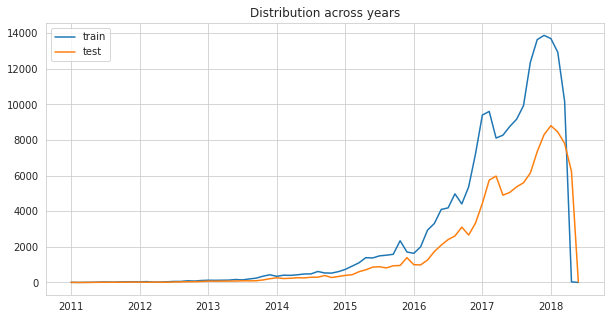

In [ ]:
year_train = train_data['first_active_month'].value_counts().sort_index()
year_test = test_data['first_active_month'].value_counts().sort_index()
ax = year_train.plot(figsize=(10, 5))
ax = year_test.plot(figsize=(10, 5))
_ = ax.set_xticklabels(range(2010, 2020))
_ = ax.set_title("Distribution across years")
_ = ax.legend(['train', 'test'])

**Observation :** Years range from 2011 to 2018. But, Most of the data lies in the years ranging from 2016 to 2018 and trends of counts for train and test data are similar.

Distribution of first_active_month across months :

In [ ]:
train_data["month"] = train_data['first_active_month'].str.split("-").str[1]
train_data.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,month
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,06
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,01
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,08
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,09
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,11


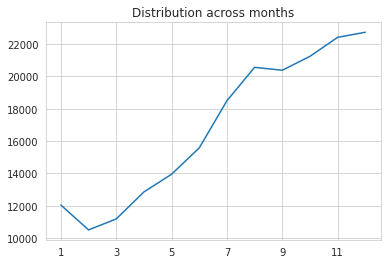

In [ ]:
temp = train_data['month'].value_counts().sort_index()
ax = temp.plot()
_ = ax.set_xticklabels(range(-1, 15, 2))
_ = ax.set_title("Distribution across months")

**Observations :** Last 6 months (July to December) has relatively more data than first 6 months (January to June).

**First_active_month Vs Target variable :**

In [ ]:
train_data['first_active_month'] = pd.to_datetime(train_data['first_active_month'],
                                             format='%Y-%m')

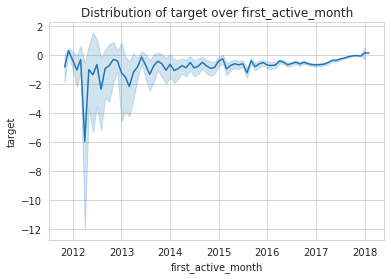

In [ ]:
sns.lineplot(x = train_data['first_active_month'], y= train_data['target'])
plt.title("Distribution of target over first_active_month")
plt.show()

**Observations :**

* The above plot reveals that the target variable (loyalty score) behaves like a damping frequency plot. And it is mentioned in the Buisness problem that the target score is calcuated with the recent year transactions.

* Older Card's: The cards which have first active month from 2012 to 2015.

* new card's: The cards which have first active month from 2015 to 2018.

* The Older card's have large number of transactions which affects the target towards the negative value. and the new card's have transactions which affects the target towards positive value.

So, I think the type of transactions by the newer card's is different from the older card's which helps in increase the loyalty Score.



**Collinearity between variables : Variance Inflation Factor**

In [ ]:
# Finding Correlation between variables of train_data features
selected_columns = ['feature_1','feature_2','feature_3']
data_frame = train_data[selected_columns]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_frame.iloc[:,:].values, i) for i in range(data_frame.shape[1])]
vif["features"] = data_frame.columns
vif

,VIF Factor,features
0,0.000327,feature_1
1,0.000158,feature_2
2,0.000653,feature_3


In [ ]:
# Finding Correlation between variables of test_data features
selected_columns = ['feature_1','feature_2','feature_3']
data_frame = test_data[selected_columns]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_frame.iloc[:,:].values, i) for i in range(data_frame.shape[1])]
vif["features"] = data_frame.columns
vif

,VIF Factor,features
0,0.000284,feature_1
1,0.000198,feature_2
2,-0.005716,feature_3


**Observations :** 

* The VIF values for all the three features are well under 10. So, there is no problem of multicollinearity in the train data and test data.
* Also VIF values are very near to 0, that interprates fetures are not at all correlated.

<h2>Exploring the historical_transactions and new_merchant_transactions data files :</h2>

In [ ]:
data_dictionary = pd.read_excel('/content/Data_Dictionary.xlsx', sheet_name='history')
data_dictionary

,historical_transactions.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Card identifier
3,month_lag,month lag to reference date
4,purchase_date,Purchase date
5,authorized_flag,"Y' if approved, 'N' if denied"
6,category_3,anonymized category
7,installments,number of installments of purchase
8,category_1,anonymized category
9,merchant_category_id,Merchant category identifier (anonymized )


In [ ]:

data_dictionary = pd.read_excel('/content/Data_Dictionary.xlsx', sheet_name='new_merchant_period')
data_dictionary

,new_merchant_period.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Card identifier
3,month_lag,month lag to reference date
4,purchase_date,Purchase date
5,authorized_flag,"Y' if approved, 'N' if denied"
6,category_3,anonymized category
7,installments,number of installments of purchase
8,category_1,anonymized category
9,merchant_category_id,Merchant category identifier (anonymized )


**Observation :** After going through Data Dictionary.xlsx, We can infer that both the data have same columns and overall same structure. So, We will Explore both data side by side.

In [ ]:
print(f'{historical_data.shape[0]} rows in data\n')
historical_data.head()

29112361 rows in data



,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [ ]:
print(f'{newmerchant_data.shape[0]} rows in data\n')
newmerchant_data.head()

1963031 rows in data



,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [18]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int16  
 3   category_1            object 
 4   installments          int16  
 5   category_3            object 
 6   merchant_category_id  int16  
 7   merchant_id           object 
 8   month_lag             int8   
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int8   
 13  subsector_id          int8   
dtypes: float64(2), int16(3), int8(3), object(6)
memory usage: 2.0+ GB


In [19]:
newmerchant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int16  
 3   category_1            object 
 4   installments          int16  
 5   category_3            object 
 6   merchant_category_id  int16  
 7   merchant_id           object 
 8   month_lag             int8   
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int8   
 13  subsector_id          int8   
dtypes: float64(2), int16(3), int8(3), object(6)
memory usage: 136.7+ MB


**Observations :**

We can see that there are:

* 6 features type ID: card_id, merchant_category_id, subsector_id, merchant_id, city_id, state_id

* 2 features type integer/counter: month_lag, installments

* 1 feature type numerical: purchase_amount

* 1 feature type date: purchase_date

* 4 features type categorical: authorized_flag, category_3, category_1, category_2

In [ ]:
historical_data.isna().any()

authorized_flag         False
card_id                 False
city_id                 False
category_1              False
installments            False
category_3               True
merchant_category_id    False
merchant_id              True
month_lag               False
purchase_amount         False
purchase_date           False
category_2               True
state_id                False
subsector_id            False
dtype: bool

In [ ]:
newmerchant_data.isna().any()

authorized_flag         False
card_id                 False
city_id                 False
category_1              False
installments            False
category_3               True
merchant_category_id    False
merchant_id              True
month_lag               False
purchase_amount         False
purchase_date           False
category_2               True
state_id                False
subsector_id            False
dtype: bool

**Observations :** Both historical_transaction and new_merchant_transaction have Nan values in same columns which are : merchand_id, category_2, category_3.

**Analysis of Category Features : category_1,category_2 and category_3**

In [ ]:
print('Value counts for category features of Historical Transactions :\n')
print(historical_data['category_1'].value_counts())
print('*****************************')
print(historical_data['category_2'].value_counts())
print('*****************************')
print(historical_data['category_3'].value_counts())

print('\nValue counts for category features of New merchant Transactions :\n')
print(newmerchant_data['category_1'].value_counts())
print('*****************************')
print(newmerchant_data['category_2'].value_counts())
print('*****************************')
print(newmerchant_data['category_3'].value_counts())



Value counts for category features of Historical Transactions :

N    27028332
Y     2084029
Name: category_1, dtype: int64
*****************************
1.0    15177199
3.0     3911795
5.0     3725915
4.0     2618053
2.0     1026535
Name: category_2, dtype: int64
*****************************
A    15411747
B    11677522
C     1844933
Name: category_3, dtype: int64

Value counts for category features of New merchant Transactions :

N    1899935
Y      63096
Name: category_1, dtype: int64
*****************************
1.0    1058242
3.0     289525
5.0     259266
4.0     178590
2.0      65663
Name: category_2, dtype: int64
*****************************
A    922244
B    836178
C    148687
Name: category_3, dtype: int64


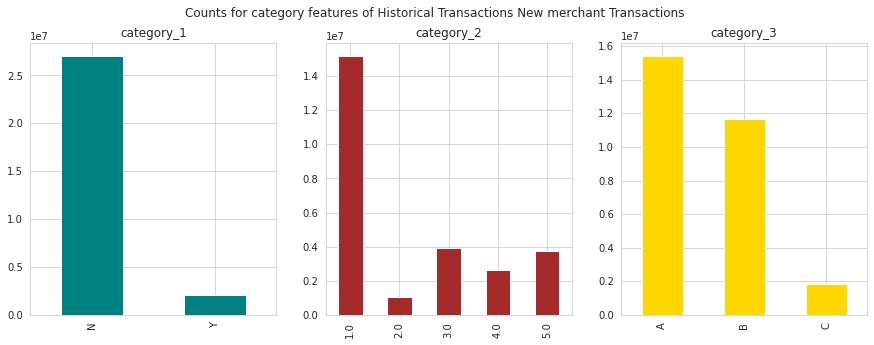

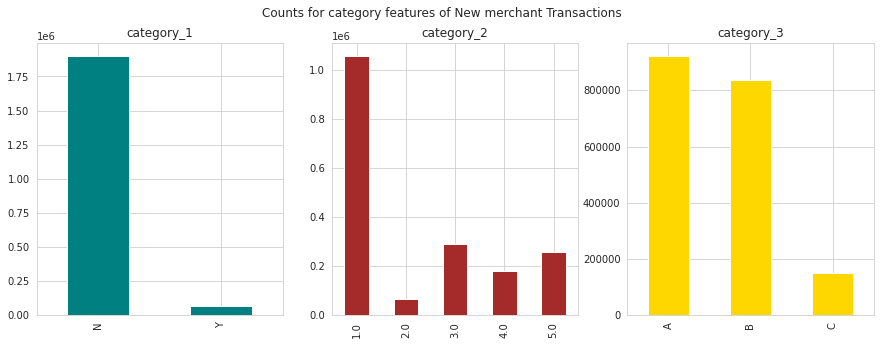

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5));
historical_data['category_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='category_1');
historical_data['category_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='category_2');
historical_data['category_3'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='category_3');
plt.suptitle('Counts for category features of Historical Transactions New merchant Transactions');


fig, ax = plt.subplots(1, 3, figsize = (15, 5));
newmerchant_data['category_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='category_1');
newmerchant_data['category_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='category_2');
newmerchant_data['category_3'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='category_3');
plt.suptitle('Counts for category features of New merchant Transactions');

**Observation :** The distribution of these three category features are almost 
identical in historical and new transactions.This shows these Category feature represent the inately charcterstics of the transactions which is constant over the period.So, these features can be an importance feature in the decision function on final model.

**Distrbution of target over categorical features :**

**Note :** The train.csv file only has the target value, which is the feature we are gonna predict with models build in the future But, transactions data don't have the target values in it for each card_id's. By merging the "target" feature with the transactions data will help in Data analysis to fully understand different fetures in transactional dataFrame.

In [ ]:
# merging target value of card_id for each transction in historical_transactions Data
historical_data = pd.merge(historical_data, train_data[['card_id','target']], how = 'outer', on = 'card_id')

# merging target value of card_id for each transction in new_merchants_transactions Data
newmerchant_data = pd.merge(newmerchant_data, train_data[['card_id','target']], how = 'outer', on = 'card_id')

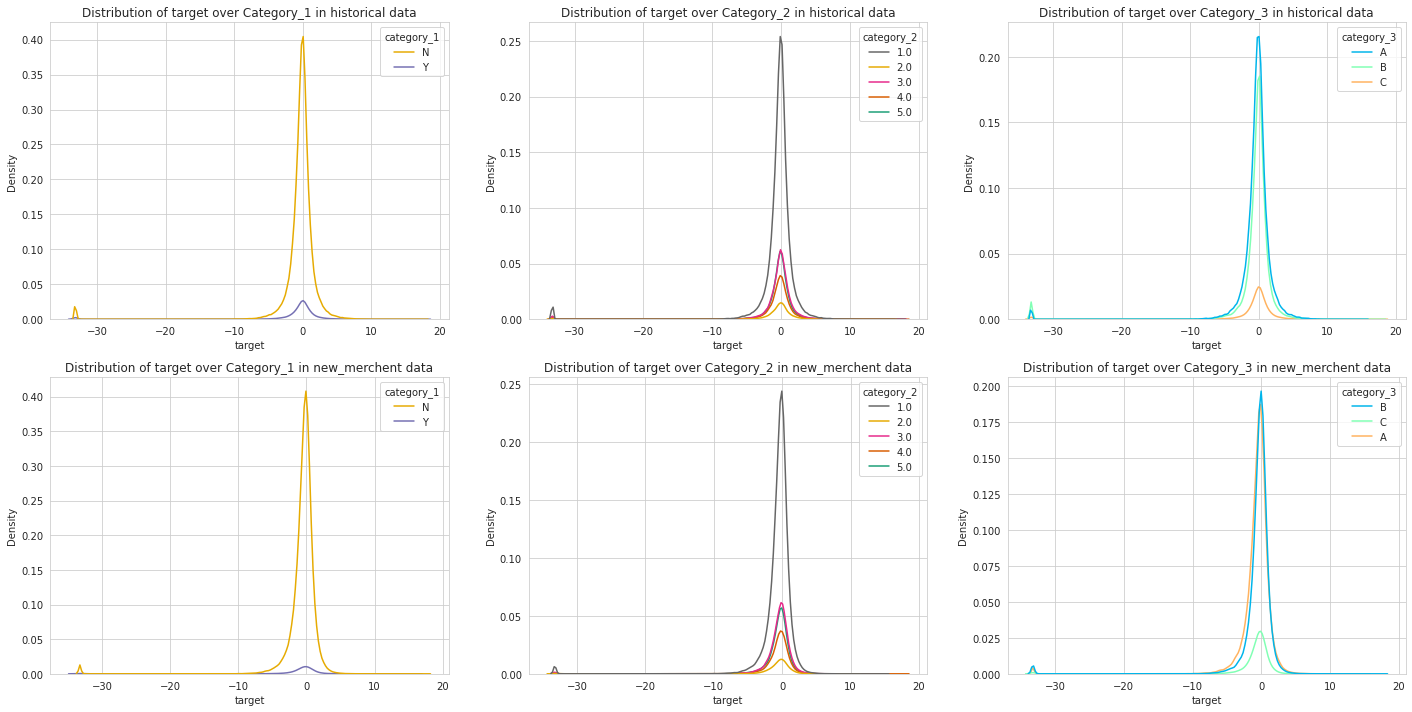

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(231)
sns.kdeplot(x ='target',data = historical_data,hue = 'category_1',palette='Dark2_r')
plt.title("Distribution of target over Category_1 in historical data")
plt.subplot(232)
sns.kdeplot(x ='target',data = historical_data,hue = 'category_2',palette='Dark2_r')
plt.title("Distribution of target over Category_2 in historical data")
plt.subplot(233)
sns.kdeplot(x ='target',data = historical_data,hue = 'category_3',palette='rainbow')
plt.title("Distribution of target over Category_3 in historical data")
plt.subplot(234)
sns.kdeplot(x ='target',data = newmerchant_data,hue = 'category_1',palette='Dark2_r')
plt.title("Distribution of target over Category_1 in new_merchent data")
plt.subplot(235)
sns.kdeplot(x ='target',data = newmerchant_data,hue = 'category_2',palette='Dark2_r')
plt.title("Distribution of target over Category_2 in new_merchent data")
plt.subplot(236)
sns.kdeplot(x ='target',data = newmerchant_data,hue = 'category_3',palette='rainbow')
plt.title("Distribution of target over Category_3 in new_merchent data")
plt.tight_layout()
plt.show()

**Observations :**

* These three category features doesn't explicity help to differentiate the target Score(Loyalty Score). Every category have outliers in each of the sub_categories. And Almost all the category have Same IQR range.

* These anonymous features doesn't reveal any important info for further feature engineering of these categories.

**Note:** The same information can be gathered by using box-plot and violin-plot, I have tried all of them. Here, I use kdeplot as I found it more visually appealing. In further analysis I have used Box-plot more often.


**Authorized Flag Feature Analysis :**

Value counts for Authorized Flag of Historical Transactions :
Y    26595452
N     2516909
Name: authorized_flag, dtype: int64
*************************************************************
Value counts for Authorized Flag of New Merchant Transactions :
Y    1963031
Name: authorized_flag, dtype: int64


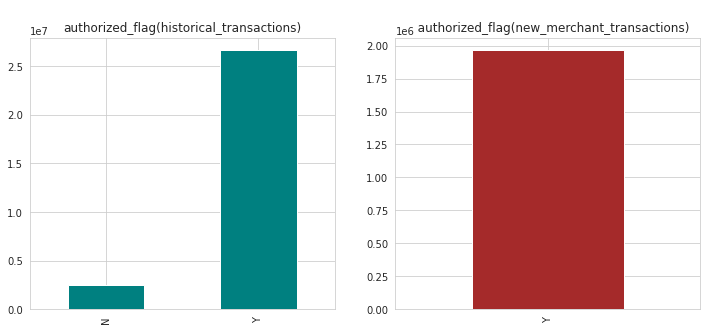

In [ ]:
print('Value counts for Authorized Flag of Historical Transactions :')
print(historical_data['authorized_flag'].value_counts())
print('*************************************************************')
print('Value counts for Authorized Flag of New Merchant Transactions :')
print(newmerchant_data['authorized_flag'].value_counts())

# barplot for the authorized_flag feature
fig, ax = plt.subplots(1, 2, figsize = (12, 5));
historical_data['authorized_flag'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='\nauthorized_flag(historical_transactions)');
newmerchant_data['authorized_flag'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='\n   authorized_flag(new_merchant_transactions)');

**Observations :**

* The new transactions have no "N" category in authorized_flag. This historical transactions have both "Y" and "N".

* The authorized_flag 'Y' if approved, 'N' if denied - whether the transaction is approved or Denied.

* If we calculate percentage of authorized transaction in historical transaction. At average 91.3545% transactions are authorized.

* This feature is an important feature for predicting the Loyalty score. because, if the card's transactions are approved most of time, there is a great chance the cards can have high Loyalty Score.

Distributions of target over authorized flag :

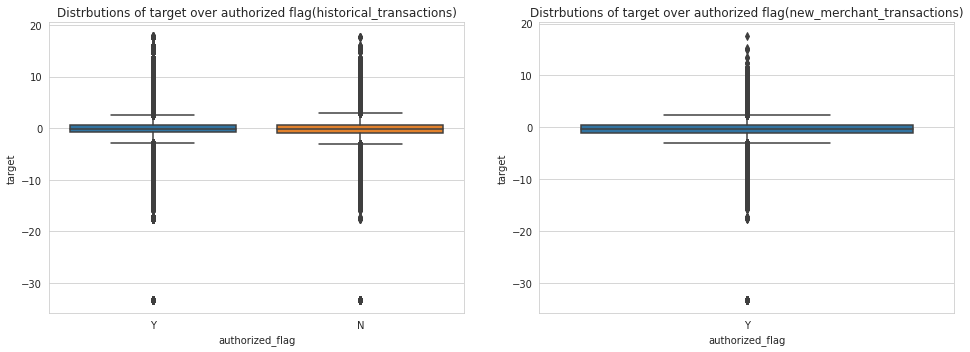

In [ ]:
plt.figure(figsize = (14,5))
plt.subplot(121)
sns.boxplot(y = 'target',x= 'authorized_flag', data = historical_data)
plt.title("Distrbutions of target over authorized flag(historical_transactions)")
plt.subplot(122)
sns.boxplot(y = 'target',x= 'authorized_flag', data = newmerchant_data)
plt.title("Distrbutions of target over authorized flag(new_merchant_transactions)")
plt.tight_layout()
plt.show()

**Observations :** 

* The authorized Flag also doesn't give a suspectble change in the IQR range between authorized and un_authorized transactions.

* Even for the un_authorized transactions card users have Same IQR. Because of the many transactions by an user, these un_authorized doesn't have much effect.

* But this categorical features also should be included using response coding.

**Analysis of installments feature :**

In [ ]:
print('Quantile values for installments in Historical Transaction :')
print('25th Percentile :',historical_data['installments'].quantile(0.25))
print('50th Percentile :',historical_data['installments'].quantile(0.50))
print('75th Percentile :',historical_data['installments'].quantile(0.75))
print('100th Percentile :',historical_data['installments'].quantile(1))
print('\n******************************************************************\n')
print('Quantile values for installments in New Merchant Transaction :')
print('25th Percentile :',newmerchant_data['installments'].quantile(0.25))
print('50th Percentile :',newmerchant_data['installments'].quantile(0.50))
print('75th Percentile :',newmerchant_data['installments'].quantile(0.75))
print('100th Percentile :',newmerchant_data['installments'].quantile(1))

Quantile values for installments in Historical Transaction :
25th Percentile : 0.0
50th Percentile : 0.0
75th Percentile : 1.0
100th Percentile : 999.0

******************************************************************

Quantile values for installments in New Merchant Transaction :
25th Percentile : 0.0
50th Percentile : 1.0
75th Percentile : 1.0
100th Percentile : 999.0


Distribution of target over installment feature :

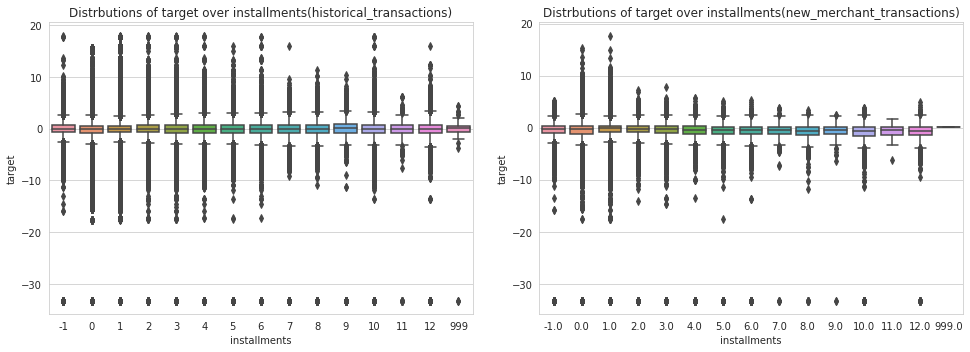

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.boxplot(y='target',x= 'installments', data = historical_data)
plt.title("Distrbutions of target over installments(historical_transactions)")
plt.subplot(122)
sns.boxplot(y='target',x = 'installments', data = newmerchant_data)
plt.title("Distrbutions of target over installments(new_merchant_transactions)")
plt.tight_layout()
plt.show()

**Observations :** The installments also have outliers, these outliers should be taken care in data preprocessing. In historical_transactions and new_merchants_transactions the 75% of installments are below 1. So, most of the payments through the cards are instant payments or short term installments.

**Analysis of purchase_amount feature :**

In [ ]:
print('Quantile values for purchase amount in Historical Transaction :')
print('25th Percentile :',historical_data['purchase_amount'].quantile(0.25))
print('50th Percentile :',historical_data['purchase_amount'].quantile(0.50))
print('75th Percentile :',historical_data['purchase_amount'].quantile(0.75))
print('100th Percentile :',historical_data['purchase_amount'].quantile(1))
print('\n******************************************************************\n')
print('Quantile values for purchase amount in New Merchant Transaction :')
print('25th Percentile :',newmerchant_data['purchase_amount'].quantile(0.25))
print('50th Percentile :',newmerchant_data['purchase_amount'].quantile(0.50))
print('75th Percentile :',newmerchant_data['purchase_amount'].quantile(0.75))
print('100th Percentile :',newmerchant_data['purchase_amount'].quantile(1))

Quantile values for purchase amount in Historical Transaction :
25th Percentile : -0.72035595
50th Percentile : -0.68834948
75th Percentile : -0.60325434
100th Percentile : 6010603.9717525

******************************************************************

Quantile values for purchase amount in New Merchant Transaction :
25th Percentile : -0.71662937
50th Percentile : -0.67484064
75th Percentile : -0.58161617
100th Percentile : 263.15749789


**Observation :** The IQR range value is very small. And there is one outlier which have 6010603.9717525. These outlier can skew the final model performance. purchase_amount is normalized. Let's have a look at it nevertheless.

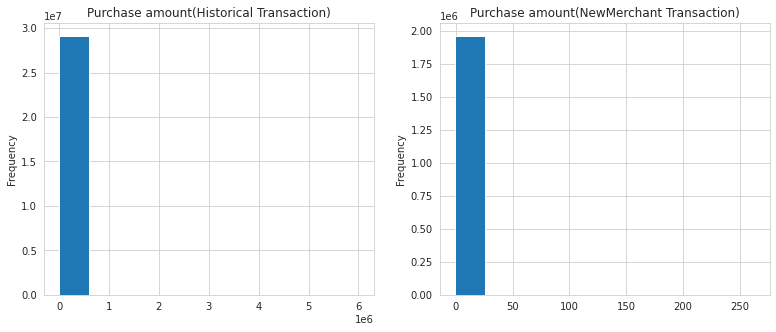

In [ ]:
plt.figure(figsize = (13,5))
plt.subplot(121)
plt.title('Purchase amount(Historical Transaction)');
historical_data['purchase_amount'].plot(kind='hist');
plt.subplot(122)
plt.title('Purchase amount(NewMerchant Transaction)');
newmerchant_data['purchase_amount'].plot(kind='hist');

In [20]:
print('For purchase_amount in Historical transactions :')
for i in [-1, 0]:
    n = historical_data.loc[historical_data['purchase_amount'] < i].shape[0]
    print(f"There are {n} transactions with purchase_amount less than {i}.")
for i in [0, 10, 100]:
    n = historical_data.loc[historical_data['purchase_amount'] > i].shape[0]
    print(f"There are {n} transactions with purchase_amount more than {i}.")
    
print('\n******************************************************************\n')
print('For purchase_amount in New Merchant transactions :')
for i in [-1, 0]:
    n = newmerchant_data.loc[newmerchant_data['purchase_amount'] < i].shape[0]
    print(f"There are {n} transactions with purchase_amount less than {i}.")
for i in [0, 10, 100]:
    n = newmerchant_data.loc[newmerchant_data['purchase_amount'] > i].shape[0]
    print(f"There are {n} transactions with purchase_amount more than {i}.")

For purchase_amount in Historical transactions :
There are 0 transactions with purchase_amount less than -1.
There are 28036884 transactions with purchase_amount less than 0.
There are 1075467 transactions with purchase_amount more than 0.
There are 14924 transactions with purchase_amount more than 10.
There are 1183 transactions with purchase_amount more than 100.

******************************************************************

For purchase_amount in New Merchant transactions :
There are 0 transactions with purchase_amount less than -1.
There are 1877357 transactions with purchase_amount less than 0.
There are 85674 transactions with purchase_amount more than 0.
There are 996 transactions with purchase_amount more than 10.
There are 2 transactions with purchase_amount more than 100.


**Observation :** As we can see the major chunk of transactions has purchase_amount less than 0. let us see Purchase amount distribution for negative values.

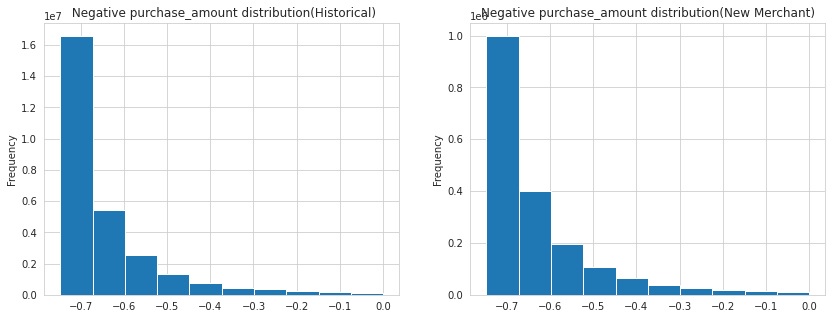

In [ ]:
plt.figure(figsize = (14,5))
plt.subplot(121)
plt.title(' Negative purchase_amount distribution(Historical)');
historical_data.loc[historical_data['purchase_amount'] < 0, 'purchase_amount'].plot(kind='hist');
plt.subplot(122)
plt.title('Negative purchase_amount distribution(New Merchant)');
newmerchant_data.loc[newmerchant_data['purchase_amount'] < 0, 'purchase_amount'].plot(kind='hist');

**Observation :** It seems that almost all transactions have purchase amount in range (-1, 0). Quite a strong normalization and high outliers, which will need to be processed.

Now, let's see purchase_amount feature over target variable :

In [ ]:
# There is one outlier which have value 6010603.9717525. So, I remove that for EDA part.
historical_data = historical_data[historical_data['purchase_amount']  != 6010603.9717525]

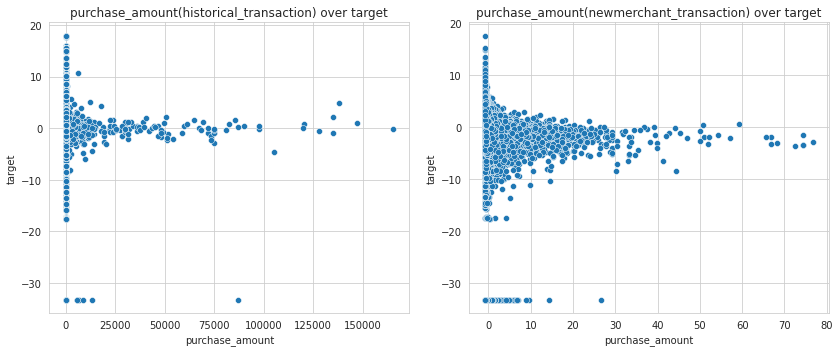

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.scatterplot(data=historical_data, x="purchase_amount", y="target")
plt.title("purchase_amount(historical_transaction) over target")
plt.subplot(122)
sns.scatterplot(data=newmerchant_data, x="purchase_amount", y="target")
plt.title("purchase_amount(newmerchant_transaction) over target")
plt.tight_layout()
plt.show()

**Observations :**

* One key observation here is, Most of the outliers in target having value around -30 are having very less purchase amount.
* With the increase in purchase amount customer become more loyal, as target score increases.

**Analysis of feature Month_lag :**

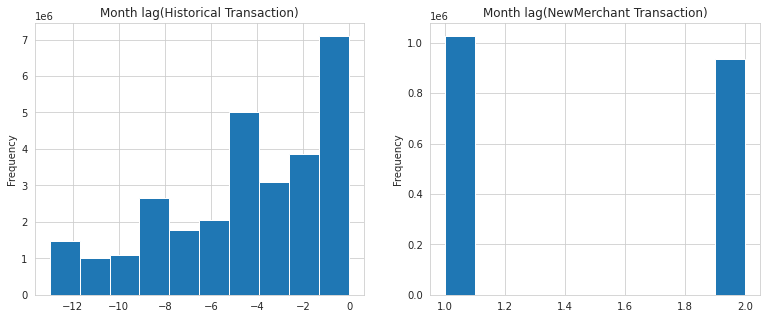

In [ ]:
plt.figure(figsize = (13,5))
plt.subplot(121)
plt.title('Month lag(Historical Transaction)');
historical_data['month_lag'].plot(kind='hist');
plt.subplot(122)
plt.title('Month lag(NewMerchant Transaction)');
newmerchant_data['month_lag'].plot(kind='hist');

Distribution of target over month_lag feature :

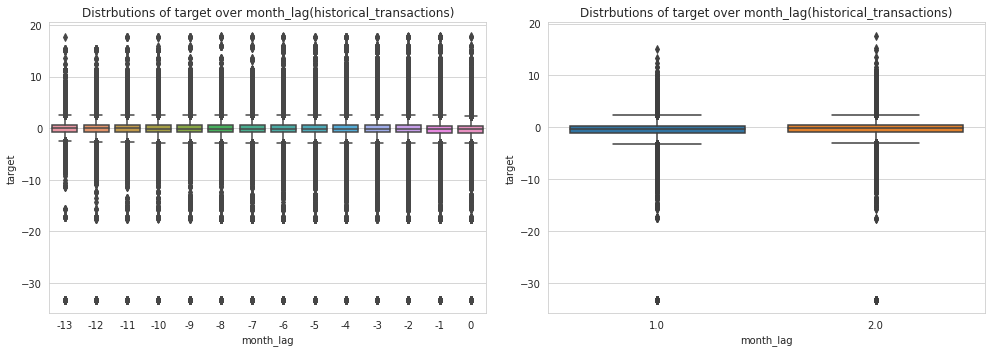

In [ ]:
plt.figure(figsize = (14,5))
plt.subplot(121)
sns.boxplot(y= 'target',x= 'month_lag', data = historical_data)
plt.title("Distrbutions of target over month_lag(historical_transactions)")

plt.subplot(122)
sns.boxplot(y= 'target',x= 'month_lag', data = newmerchant_data)
plt.title("Distrbutions of target over month_lag(historical_transactions)")
plt.tight_layout()
plt.show()

**Observations :** 

* The Month_lag gives important info to predict the loyalty score. For a Purchase in installments, how many months the card lags from the actual end date of installment is the month_lag feature.

* The historical_transactions have month_lags from 0 to 13. which means the cards with transactions in histortical_transactions data have lag of installments from 0 to 13. But, the new_merchant_transactions have month_lag 1 and 2 only.

* This again proves the difference in the transactions type between the historical and new merchants.

**Analysis of feature purchase_date :**

At first, we convert purchase_date to datetime format :

In [ ]:
historical_data['purchase_date'] = pd.to_datetime(historical_data['purchase_date'],
                                             format='%Y-%m-%d %H:%M:%S')
newmerchant_data['purchase_date'] = pd.to_datetime(newmerchant_data['purchase_date'],
                                             format='%Y-%m-%d %H:%M:%S')

Number of transactions vs Year :

Year-Wise Percentage distribution of purchase_date(Historical-Transaction) :
2017    81.848631
2018    18.151369
Name: purchase_date, dtype: float64

Year-Wise Percentage distribution of purchase_date(NewMerchant-Transaction) :
2018.0    84.540081
2017.0    15.459919
Name: purchase_date, dtype: float64


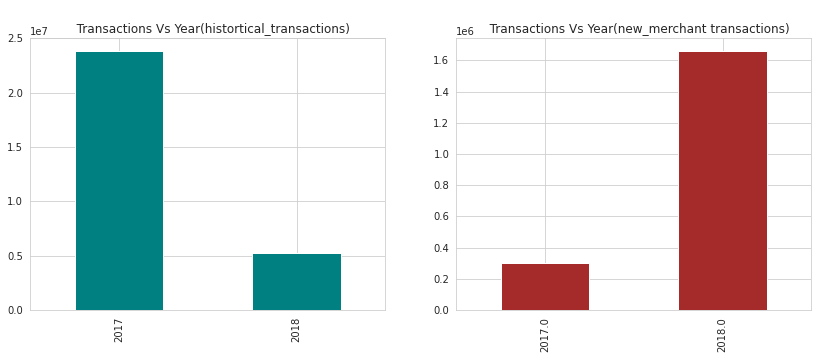

In [ ]:
# barplot for the Number of transactions vs Year
fig, ax = plt.subplots(1, 2, figsize = (14, 5));
historical_data['purchase_date'].dt.year.value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='\n   Transactions Vs Year(histortical_transactions)');
newmerchant_data['purchase_date'].dt.year.value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='\n   Transactions Vs Year(new_merchant transactions)');


print('Year-Wise Percentage distribution of purchase_date(Historical-Transaction) :')
print(historical_data['purchase_date'].dt.year.value_counts(normalize = True)*100)
print('\nYear-Wise Percentage distribution of purchase_date(NewMerchant-Transaction) :')
print(newmerchant_data['purchase_date'].dt.year.value_counts(normalize = True)*100)

**Observations :**

* In historical_transactions, The transactions with respect to year 2017 is way more (~82%) than transactions in 2018 (18%). 

* But, In new_merchant_transactions, transactions with respect to 2018 is way more (~85%) than transactions in 2018 (15%).

* Then we can say, new_merchant_transactions are the recent year transactions. This is the reason for the disparity in the purchase amount and installment features.

Number of transactions vs Week

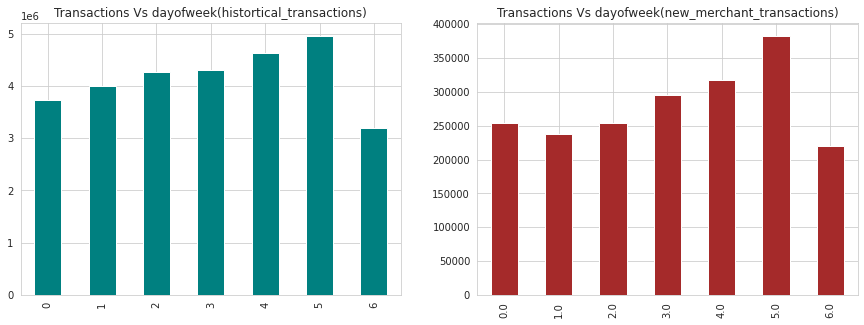

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5));
historical_data['purchase_date'].dt.dayofweek.value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='Transactions Vs dayofweek(histortical_transactions)');
newmerchant_data['purchase_date'].dt.dayofweek.value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='Transactions Vs dayofweek(new_merchant_transactions)');

Distribution of target over dayofweek :

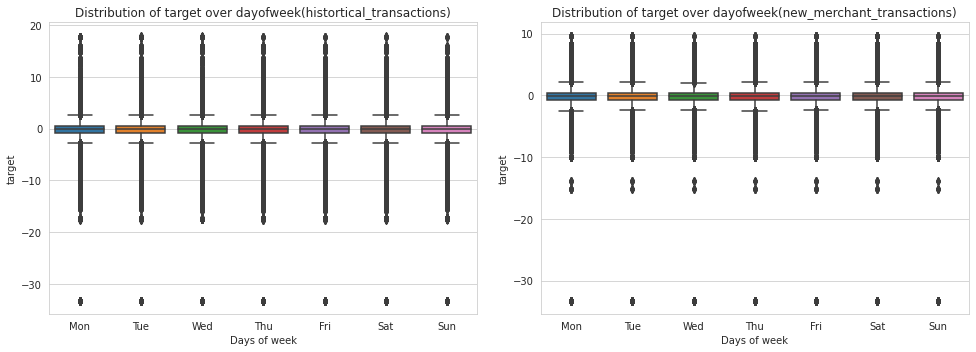

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.boxplot(y = historical_data['target'], x = historical_data['purchase_date'].dt.dayofweek)
plt.xticks(range(0,7),labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Days of week')
plt.title("Distribution of target over dayofweek(histortical_transactions)")

plt.subplot(122)
sns.boxplot(y = historical_data['target'], x = newmerchant_data['purchase_date'].dt.dayofweek)
plt.xticks(range(0,7),labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Days of week')
plt.title("Distribution of target over dayofweek(new_merchant_transactions)")
plt.tight_layout()
plt.show()

Number of transactions vs hour

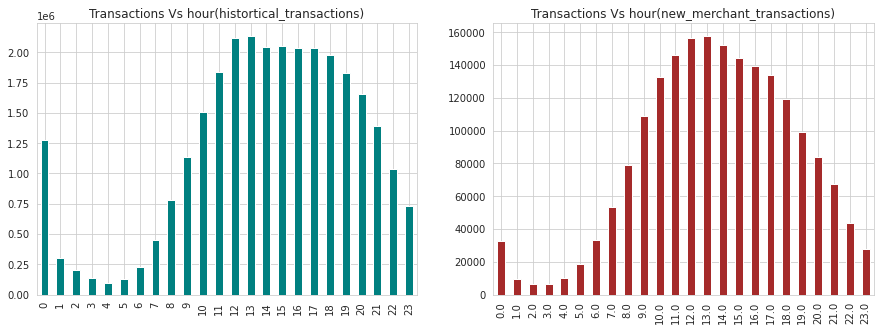

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5));
historical_data['purchase_date'].dt.hour.value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='Transactions Vs hour(histortical_transactions)');
newmerchant_data['purchase_date'].dt.hour.value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='Transactions Vs hour(new_merchant_transactions)');

Distribution of target over hour :

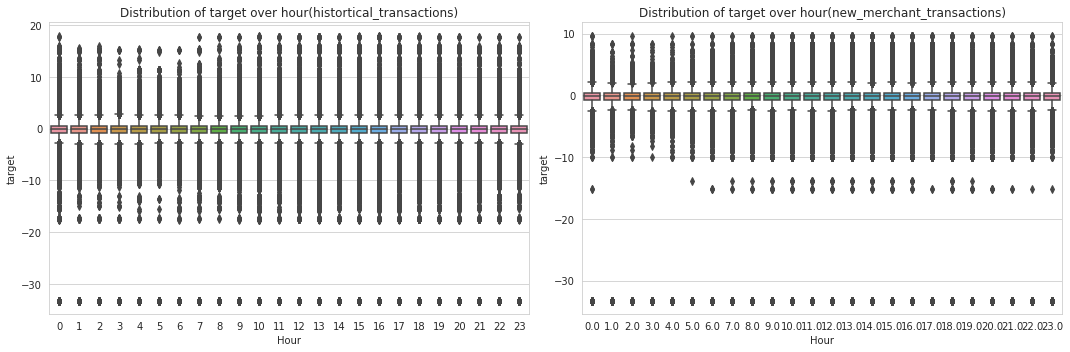

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(y = historical_data['target'], x = historical_data['purchase_date'].dt.hour)
plt.xlabel('Hour')
plt.xticks(range(0,24))
plt.title("Distribution of target over hour(histortical_transactions)")

plt.subplot(122)
sns.boxplot(y = historical_data['target'], x = newmerchant_data['purchase_date'].dt.hour)
plt.xlabel('Hour')
plt.xticks(range(0,24))
plt.title("Distribution of target over hour(new_merchant_transactions)")
plt.tight_layout()
plt.show()


**Observations :**

* From the distribution of both weekly and hourly transactions count, these transactions have not much difference in their distributions.

* Since, the data given in the problem is a generated data and not a real time data. The distribution of the transactions over the purchase date is similar.

* But, the type of transactions differs from historical and new_merchants in terms of purchase_amount,month_lag and installments.

* By checking the number of merchants are in both historical and new_merchants transactions, we can get exclusive informations of the merchants.

**Let's create a feature called Number of transactions for each card_id and see - How it impacts target variable ?**

Number of Transactions feature is not explicitly given in any of the file but we can derive it with some hacks :

In [ ]:
# For historical transaction
g = historical_data[['card_id']].groupby('card_id')
df_transaction_counts = g.size().reset_index(name='num_transactions')
historical_data = pd.merge(historical_data ,df_transaction_counts, on="card_id",how='left')
historical_data.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,target,num_transactions
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37,NaN,400
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16,NaN,400
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37,NaN,400
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34,NaN,400
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37,NaN,400


In [ ]:
historical_data['num_transactions'].describe()

count    2.911236e+07
mean     2.133682e+02
std      2.108363e+02
min      2.000000e+00
25%      7.800000e+01
50%      1.520000e+02
75%      2.840000e+02
max      5.582000e+03
Name: num_transactions, dtype: float64

In [ ]:
#For New Merchant transaction
g = newmerchant_data[['card_id']].groupby('card_id')
df_transaction_counts = g.size().reset_index(name='num_transactions')
newmerchant_data = pd.merge(newmerchant_data ,df_transaction_counts, on="card_id",how='left')
newmerchant_data.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,target,num_transactions
0,Y,C_ID_415bb3a509,107.0,N,1.0,B,307.0,M_ID_b0c793002c,1.0,-0.557574,2018-03-11 14:57:36,1.0,9.0,19.0,NaN,4
1,Y,C_ID_415bb3a509,140.0,N,1.0,B,307.0,M_ID_88920c89e8,1.0,-0.569580,2018-03-19 18:53:37,1.0,9.0,19.0,NaN,4
2,Y,C_ID_415bb3a509,330.0,N,1.0,B,507.0,M_ID_ad5237ef6b,2.0,-0.551037,2018-04-26 14:08:44,1.0,9.0,14.0,NaN,4
3,Y,C_ID_415bb3a509,-1.0,Y,1.0,B,661.0,M_ID_9e84cda3b1,1.0,-0.671925,2018-03-07 09:43:21,NaN,-1.0,8.0,NaN,4
4,Y,C_ID_ef55cf8d4b,-1.0,Y,1.0,B,166.0,M_ID_3c86fa3831,1.0,-0.659904,2018-03-22 21:07:53,NaN,-1.0,29.0,-4.839243,22


In [ ]:
newmerchant_data['num_transactions'].describe()

count    1.984962e+06
mean     1.322025e+01
std      1.059866e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.000000e+01
75%      1.800000e+01
max      1.090000e+02
Name: num_transactions, dtype: float64

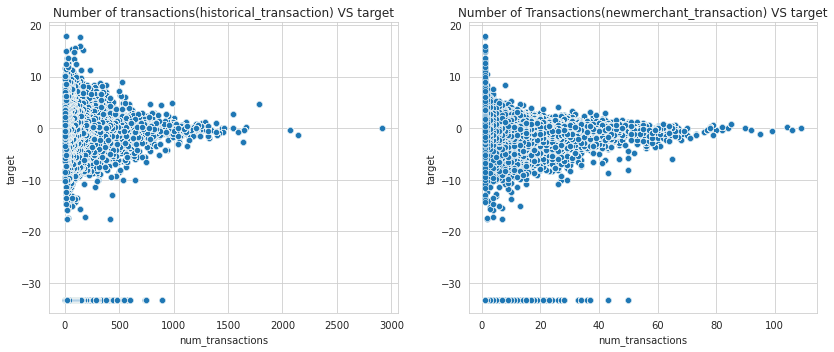

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.scatterplot(data=historical_data, x="num_transactions", y="target")
plt.title("Number of transactions(historical_transaction) VS target")
plt.subplot(122)
sns.scatterplot(data=newmerchant_data, x="num_transactions", y="target")
plt.title("Number of Transactions(newmerchant_transaction) VS target")
plt.tight_layout()
plt.show()

**Observations :**

* One key observation here is, Most of the outliers in target having value around -30 are having very less no of transactions.
* With increase in no of transactions customer become more loyal, as target score increases.

**Collinearity between variables : Variance Inflation Factor**

In [ ]:
selected_columns = ['category_2','month_lag','purchase_amount','state_id','subsector_id', 'installments']
data_frame = newmerchant_data[selected_columns]

data_frame = data_frame.dropna()

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_frame.iloc[:,:].values, i) for i in range(data_frame.shape[1])]
vif["features"] = data_frame.columns
vif

,VIF Factor,features
0,2.961368,category_2
1,6.079920,month_lag
2,1.769963,purchase_amount
3,4.753116,state_id
4,5.733107,subsector_id
5,1.186565,installments


All values are under 10, let's add some more features and again we'll calculate the VIF :




In [ ]:
Dict = {'A':1,'B':2,'C':3}
Dict1 = {'Y':1,'N':0}

selected_columns = ['authorized_flag','category_3','category_2','month_lag','purchase_amount','state_id','subsector_id', 'installments']
data_frame = newmerchant_data[selected_columns]
data_frame['category_3'] = data_frame['category_3'].map(Dict)
data_frame['authorized_flag'] = data_frame['authorized_flag'].map(Dict1)

data_frame = data_frame.dropna()

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_frame.iloc[:,:].values, i) for i in range(data_frame.shape[1])]
vif["features"] = data_frame.columns
vif

,VIF Factor,features
0,31.880430,authorized_flag
1,1.493133,category_3
2,1.021653,category_2
3,1.000173,month_lag
4,1.067406,purchase_amount
5,1.021572,state_id
6,1.010238,subsector_id
7,1.528135,installments


**Observations :**

* The value for the authorized flag is somewhat higher, it is around 32 which indicates possible correlation. So this variable needs further investigation.

* Other than the authorized flag the remaining variables doesn't look correlated. They are well under 2.

<h2>Exploring the Merchant Data :</h2>



In [ ]:
data_dictionary = pd.read_excel('/content/Data_Dictionary.xlsx', sheet_name='merchant')
data_dictionary

,merchants.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,merchant_id,Unique merchant identifier
3,merchant_group_id,Merchant group (anonymized )
4,merchant_category_id,Unique identifier for merchant category (anony...
5,subsector_id,Merchant category group (anonymized )
6,numerical_1,anonymized measure
7,numerical_2,anonymized measure
8,category_1,anonymized category
9,most_recent_sales_range,Range of revenue (monetary units) in last acti...


In [ ]:
merchants_data.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [ ]:
merchants_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  334696 non-null  object 
 1   merchant_group_id            334696 non-null  int32  
 2   merchant_category_id         334696 non-null  int16  
 3   subsector_id                 334696 non-null  int8   
 4   numerical_1                  334696 non-null  float64
 5   numerical_2                  334696 non-null  float64
 6   category_1                   334696 non-null  object 
 7   most_recent_sales_range      334696 non-null  object 
 8   most_recent_purchases_range  334696 non-null  object 
 9   avg_sales_lag3               334683 non-null  float64
 10  avg_purchases_lag3           334696 non-null  float64
 11  active_months_lag3           334696 non-null  int8   
 12  avg_sales_lag6               334683 non-null  float64
 13 

In [ ]:
merchants_data.isna().any()

merchant_id                    False
merchant_group_id              False
merchant_category_id           False
subsector_id                   False
numerical_1                    False
numerical_2                    False
category_1                     False
most_recent_sales_range        False
most_recent_purchases_range    False
avg_sales_lag3                  True
avg_purchases_lag3             False
active_months_lag3             False
avg_sales_lag6                  True
avg_purchases_lag6             False
active_months_lag6             False
avg_sales_lag12                 True
avg_purchases_lag12            False
active_months_lag12            False
category_4                     False
city_id                        False
state_id                       False
category_2                      True
dtype: bool

**Observations :** Merchant data has missing values in columns : avg_sales_lag3, avg_sales_lag6, avg_sales_lag12 and category_2.

**Analysis of Numerical features : numerical_1 and numerical_2**

In [ ]:
print('Quantile values for numeric_1 in Transaction data:')
print('25th Percentile :',merchants_data['numerical_1'].quantile(0.25))
print('50th Percentile :',merchants_data['numerical_1'].quantile(0.50))
print('75th Percentile :',merchants_data['numerical_1'].quantile(0.75))
print('100th Percentile :',merchants_data['numerical_1'].quantile(1))
print('\n******************************************************************\n')
print('Quantile values for numeric_2 in Transaction data:')
print('25th Percentile :',merchants_data['numerical_2'].quantile(0.25))
print('50th Percentile :',merchants_data['numerical_2'].quantile(0.50))
print('75th Percentile :',merchants_data['numerical_2'].quantile(0.75))
print('100th Percentile :',merchants_data['numerical_2'].quantile(1))

Quantile values for numeric_1 in Transaction data:
25th Percentile : -0.05747065
50th Percentile : -0.05747065
75th Percentile : -0.04755575
100th Percentile : 183.73511137

******************************************************************

Quantile values for numeric_2 in Transaction data:
25th Percentile : -0.05747065
50th Percentile : -0.05747065
75th Percentile : -0.04755575
100th Percentile : 182.07932234


**Observation :** I think the Distribution of numerical_1 and numerical_2 featurs are almost identical, because three qunatiles have identical values.

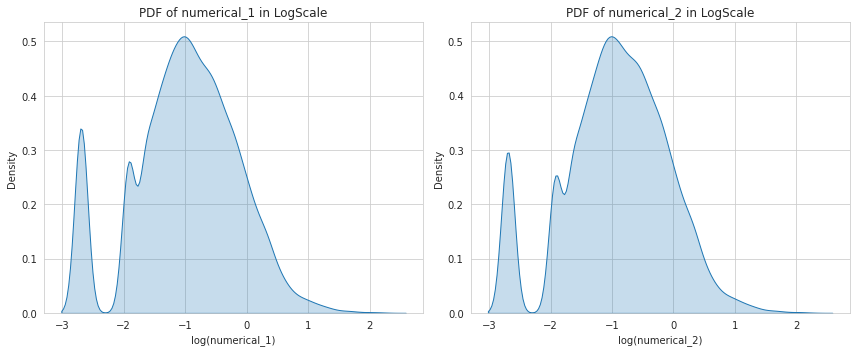

In [ ]:
plt.figure(figsize=(12,5) )
plt.subplot(121)
sns.kdeplot(np.log10(merchants_data['numerical_1']),shade=True)
plt.title("PDF of numerical_1 in LogScale")
plt.xlabel('log(numerical_1)')
plt.subplot(122)
sns.kdeplot(np.log10(merchants_data['numerical_2']),shade=True)
plt.title("PDF of numerical_2 in LogScale")
plt.xlabel('log(numerical_2)')
plt.tight_layout()
plt.show()

**Observation :** After plotting PDF, it is very clear that both the features have same distribution, may be they are duplicates of each other.

**Note :** The values for numeric_1 and numeric_2 are mostly -ve and very near to zero. So, I preferred LogScale for analysis.

**Analysis of the three anonymized category features : category_1,category_2 and category_4**

Value counts for category features of Merchants data :

N    327657
Y      7039
Name: category_1, dtype: int64
******************************
1.0    160888
5.0     52923
3.0     51887
4.0     36450
2.0     20661
Name: category_2, dtype: int64
******************************
N    238596
Y     96100
Name: category_4, dtype: int64


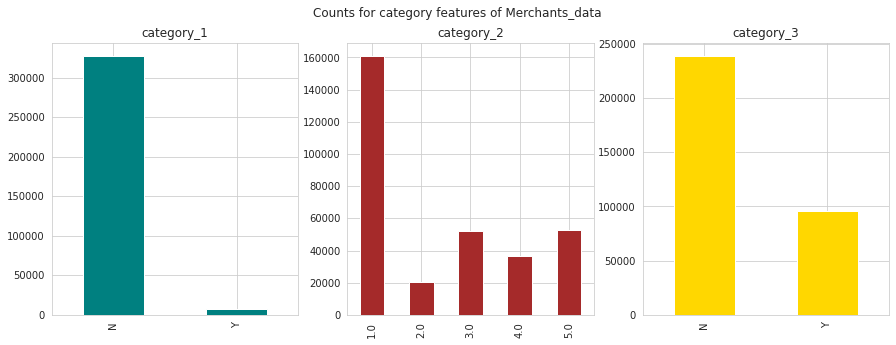

In [ ]:
print('Value counts for category features of Merchants data :\n')
print(merchants_data['category_1'].value_counts())
print('******************************')
print(merchants_data['category_2'].value_counts())
print('******************************')
print(merchants_data['category_4'].value_counts())

fig, ax = plt.subplots(1, 3, figsize = (15, 5));
merchants_data['category_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='category_1');
merchants_data['category_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='category_2');
merchants_data['category_4'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='category_3');
plt.suptitle('Counts for category features of Merchants_data');
             


**Observation :** These are anonymous categories, which can represent some properties of the merchants, which is still unclear after merging with the transactions data it can reveal more info.

**Analysis of feture most_recent_sales_range and most_recent_purchases_range :**

E    177104
D    117475
C     34075
B      5037
A      1005
Name: most_recent_sales_range, dtype: int64
*******************************************
E    175309
D    119187
C     34144
B      5046
A      1010
Name: most_recent_purchases_range, dtype: int64


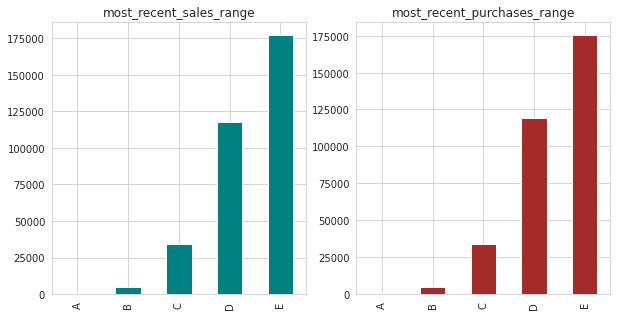

In [ ]:
print(merchants_data['most_recent_sales_range'].value_counts())
print('*******************************************')
print(merchants_data['most_recent_purchases_range'].value_counts())

fig, ax = plt.subplots(1, 2, figsize = (10, 5));
merchants_data['most_recent_sales_range'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='most_recent_sales_range');
merchants_data['most_recent_purchases_range'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='most_recent_purchases_range');

**Observations :**

* Both the features have very similar distributions.

* The sales range in last active month is a categorical feature with "A","B","C","D","E". after observing the trend from graph we can say Range of revenue (monetary units) is in order E > D > C > B > A.

* The Bar Plot shows there are many merchants with revenue range of "E" than other ranges.

* And also, Bar Plot shows there are many merchants with purchase quantity range of "E" than other ranges.

* The sales range and purchase range can be used in aggregated to know the card_id's most visited merchants in the final features for training.

**Analysis of Sales Average features : avg_sales_lag3,avg_sales_lag3,avg_sales_lag3,avg_purchases_lag6,avg_purchases_lag6 and avg_purchases_lag6**


In [ ]:
print('Quantile values for avg_sales_lag3 in Transaction data:')
print('25th Percentile :',merchants_data['avg_sales_lag3'].quantile(0.25))
print('50th Percentile :',merchants_data['avg_sales_lag3'].quantile(0.50))
print('75th Percentile :',merchants_data['avg_sales_lag3'].quantile(0.75))
print('100th Percentile :',merchants_data['avg_sales_lag3'].quantile(1))
print('\n******************************************************************\n')
print('Quantile values for avg_sales_lag6 in Transaction data:')
print('25th Percentile :',merchants_data['avg_sales_lag6'].quantile(0.25))
print('50th Percentile :',merchants_data['avg_sales_lag6'].quantile(0.50))
print('75th Percentile :',merchants_data['avg_sales_lag6'].quantile(0.75))
print('100th Percentile :',merchants_data['avg_sales_lag6'].quantile(1))
print('Quantile values for numeric_1 in Transaction data6:')
print('\n******************************************************************\n')
print('Quantile values for avg_sales_lag12 in Transaction data:')
print('25th Percentile :',merchants_data['avg_sales_lag12'].quantile(0.25))
print('50th Percentile :',merchants_data['avg_sales_lag12'].quantile(0.50))
print('75th Percentile :',merchants_data['avg_sales_lag12'].quantile(0.75))
print('100th Percentile :',merchants_data['avg_sales_lag12'].quantile(1))

Quantile values for avg_sales_lag3 in Transaction data:
25th Percentile : 0.88
50th Percentile : 1.0
75th Percentile : 1.16
100th Percentile : 851844.64

******************************************************************

Quantile values for avg_sales_lag6 in Transaction data:
25th Percentile : 0.85
50th Percentile : 1.01
75th Percentile : 1.23
100th Percentile : 1513959.0
Quantile values for numeric_1 in Transaction data6:

******************************************************************

Quantile values for avg_sales_lag12 in Transaction data:
25th Percentile : 0.85
50th Percentile : 1.02
75th Percentile : 1.29
100th Percentile : 2567408.0


In [ ]:
print('Statistical insights for avg_purchases_lag3 in Transaction data:')
print(merchants_data['avg_purchases_lag3'].describe())
print('\n******************************************************************\n')
print('Statistical insights for avg_purchases_lag6 in Transaction data:')
print(merchants_data['avg_purchases_lag6'].describe())
print('\n******************************************************************\n')
print('Statistical insights for avg_purchases_lag12 in Transaction data:')
print(merchants_data['avg_purchases_lag12'].describe())

Statistical insights for avg_purchases_lag3 in Transaction data:
count    3.346960e+05
mean              inf
std               NaN
min      3.334953e-01
25%      9.236499e-01
50%      1.016667e+00
75%      1.146522e+00
max               inf
Name: avg_purchases_lag3, dtype: float64

******************************************************************

Statistical insights for avg_purchases_lag6 in Transaction data:
count    3.346960e+05
mean              inf
std               NaN
min      1.670447e-01
25%      9.022475e-01
50%      1.026961e+00
75%      1.215575e+00
max               inf
Name: avg_purchases_lag6, dtype: float64

******************************************************************

Statistical insights for avg_purchases_lag12 in Transaction data:
count    3.346960e+05
mean              inf
std               NaN
min      9.832954e-02
25%      8.983333e-01
50%      1.043361e+00
75%      1.266480e+00
max               inf
Name: avg_purchases_lag12, dtype: float64


**Observation :** There are outliers with the value inf in each of these columns, we have to deal with it. For EDA part, I am removing the corrosponding rows with the inf values in the columns avg_purchases_lag3,avg_purchases_lag6,avg_purchases_lag12. We will se what else we can do with these outliers in preprocessing part.

In [ ]:
merchants_data = merchants_data[merchants_data['avg_purchases_lag3']  != np.inf]
merchants_data = merchants_data[merchants_data['avg_purchases_lag6']  != np.inf]
merchants_data = merchants_data[merchants_data['avg_purchases_lag12']  != np.inf]

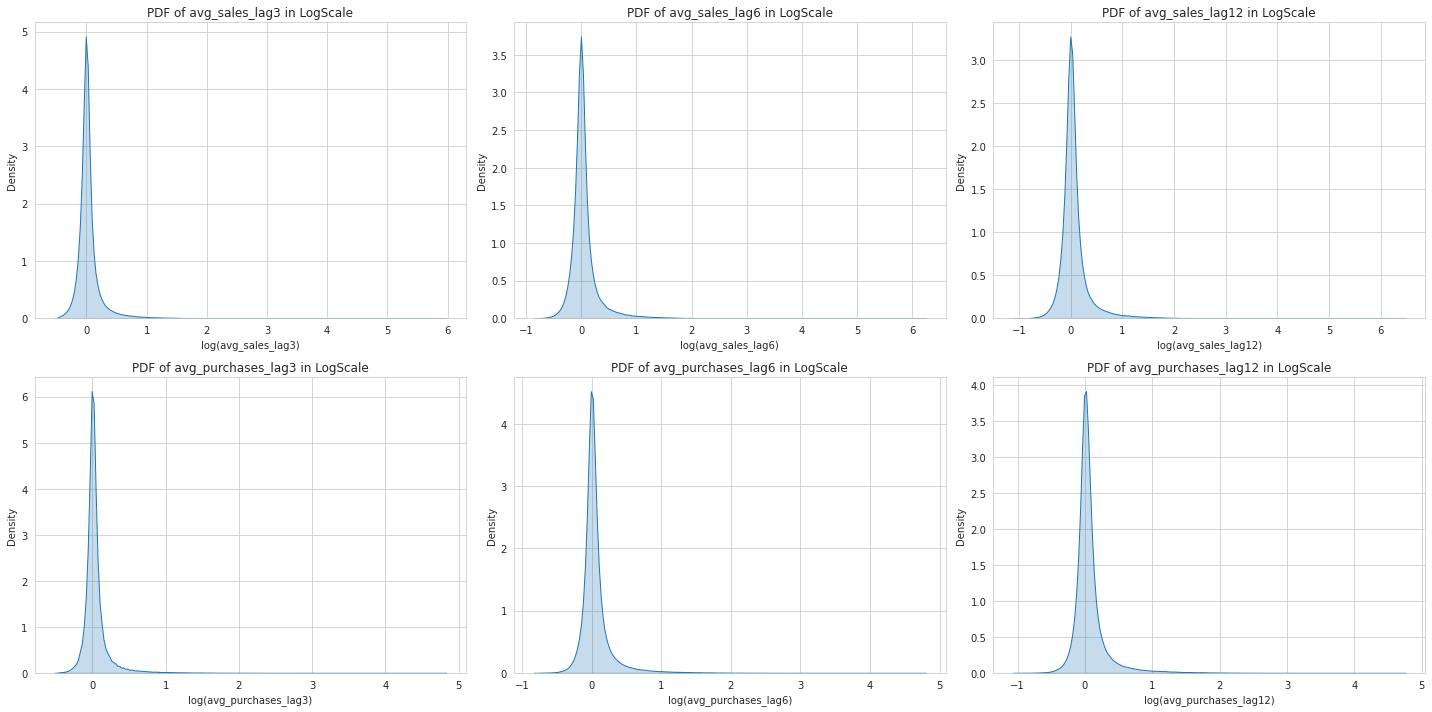

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(231)
sns.kdeplot(np.log10(merchants_data['avg_sales_lag3']),shade=True)
plt.title("PDF of avg_sales_lag3 in LogScale")
plt.xlabel('log(avg_sales_lag3)')
plt.subplot(232)
sns.kdeplot(np.log10(merchants_data['avg_sales_lag6']),shade=True)
plt.title("PDF of avg_sales_lag6 in LogScale")
plt.xlabel('log(avg_sales_lag6)')
plt.subplot(233)
sns.kdeplot(np.log10(merchants_data['avg_sales_lag12']),shade=True)
plt.title("PDF of avg_sales_lag12 in LogScale")
plt.xlabel('log(avg_sales_lag12)')
plt.subplot(234)
sns.kdeplot(np.log10(merchants_data['avg_purchases_lag3']),shade=True)
plt.title("PDF of avg_purchases_lag3 in LogScale")
plt.xlabel('log(avg_purchases_lag3)')
plt.subplot(235)
sns.kdeplot(np.log10(merchants_data['avg_purchases_lag6']),shade=True)
plt.title("PDF of avg_purchases_lag6 in LogScale")
plt.xlabel('log(avg_purchases_lag6)')
plt.subplot(236)
sns.kdeplot(np.log10(merchants_data['avg_purchases_lag12']),shade=True)
plt.title("PDF of avg_purchases_lag12 in LogScale")
plt.xlabel('log(avg_purchases_lag12)')
plt.tight_layout()
plt.show()

**Observations :** 

* The average purchases and sales across 3,6 and 12 months are distributed near 1.

* And, there are outliers in all the average sales and purchases. These features gives info about the merchants but not about the card_id's. The information about the merchants have to cumulated for each card_id's.

**Note :** The values for All the sales features listed above are mostly surrounded very near to 1. So, I preferred LogScale for analysis.

**Quantity of active months : Analysis of features(active_months_lag3,active_months_lag6 and active_months_lag3) :**

3    333259
2       896
1       538
Name: active_months_lag3, dtype: int64
**********************************
6    327281
5      2276
4      2050
3      1652
2       896
1       538
Name: active_months_lag6, dtype: int64
**********************************
12    305098
11      4449
10      4143
9       3824
8       3756
7       3274
6       2737
5       2276
4       2050
3       1652
2        896
1        538
Name: active_months_lag12, dtype: int64


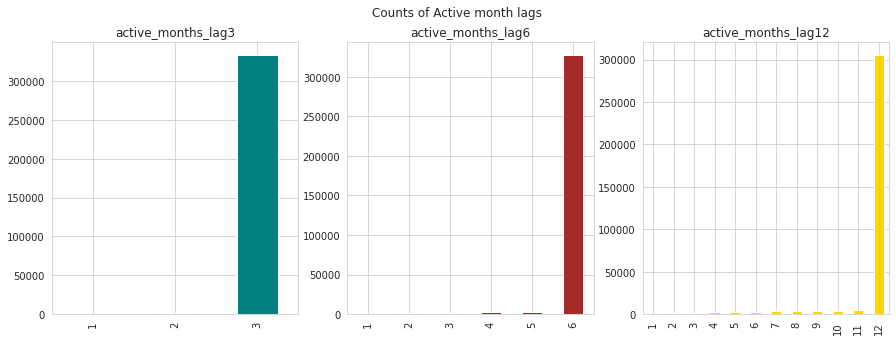

In [ ]:
print(merchants_data['active_months_lag3'].value_counts())
print('**********************************')
print(merchants_data['active_months_lag6'].value_counts())
print('**********************************')
print(merchants_data['active_months_lag12'].value_counts())

fig, ax = plt.subplots(1, 3, figsize = (15, 5));
merchants_data['active_months_lag3'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='active_months_lag3');
merchants_data['active_months_lag6'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='active_months_lag6');
merchants_data['active_months_lag12'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='active_months_lag12');
plt.suptitle('Counts of Active month lags');

**Observations :** The active months features are greatly skewed and doesn't provide any vital information about the cards.

**Correlation between variables : Variance Inflation Factor**

In [ ]:
selected_columns = ['numerical_1', 'numerical_2','category_2','avg_sales_lag3','avg_sales_lag6','avg_sales_lag12','avg_purchases_lag3','avg_purchases_lag6','avg_purchases_lag12','active_months_lag3','active_months_lag6','active_months_lag12']
data_frame = merchants_data[selected_columns]
data_frame = data_frame.dropna()

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_frame.iloc[:,:].values, i) for i in range(data_frame.shape[1])]
vif["features"] = data_frame.columns
vif

,VIF Factor,features
0,399.574679,numerical_1
1,399.550623,numerical_2
2,3.312617,category_2
3,45.881709,avg_sales_lag3
4,252.021643,avg_sales_lag6
5,130.293215,avg_sales_lag12
6,398.529705,avg_purchases_lag3
7,1603.753930,avg_purchases_lag6
8,580.461849,avg_purchases_lag12
9,512.152932,active_months_lag3


**Observation :** Looks like there are variables which are heavily correlated like active_months_lag6, avg_purchase_lag6 and avg_sales_lag_6 and avg_purchase_lag12 and as we seen before the numerical_1 and numerical_2 have similar values and distributions and they are correlated.



**TOTAL OBSERVATIONS :**

1) Target variable i.e. Loyalty scores are real-numbers, It directly gives us the intuition that we have to go for a supervised machine learning regression model to solve this problem.

1) The data files are train, test, new_merchant, merchant and historical transactions. but datasets are largely anonymized, and the meaning of the features are not elaborated.

2) The dimensionality of train and test data is very less. That clearly shows that the information provided is not sufficient for training. As only three features have been given in the train file which seems to be not sufficient to make good predictions. More features must be added to this with the help of domain knowledge and the business problem given.

3) Distribution of both the train and test are almost identical. So there is no time based splitting in the make over of the data. And, it assures for prediction of the test data.

4) The target variable is normally distributed but, there are outliers which seems to be accumulated around -30.

4) Data is not complete as nan values are present in the merchants, historical and new merchants transactions, so these missing values must be imputed for better predciton.

6) One-hot encoding/response coding of categorical features should be done for better prediction. The categorical features present across dataset are large in number than numerical features. 

7) Merchants data have high number of correlated features in it as compared to other data files. This is suggested by the calcuation of the VIF Scores and Pearson Correlation Coefficient.

<h3>Data preprocessing :</h3>

**1.Label Encoding :**

In [ ]:
# In historical_transactions
historical_data['category_3'].replace({'A':1, 'B':2,'C':3}, inplace=True)
historical_data['category_1'].replace({'N':0, 'Y':1}, inplace=True)
historical_data['authorized_flag'].replace({'N':0, 'Y':1}, inplace=True)

# In new_merch_transactions
newmerchant_data['category_3'].replace({'A':1, 'B':2,'C':3}, inplace=True)
newmerchant_data['category_1'].replace({'N':0, 'Y':1}, inplace=True)
newmerchant_data['authorized_flag'].replace({'N':0, 'Y':1}, inplace=True)

# In merchant_transactions
merchants_data['category_1'].replace({'N':0, 'Y':1}, inplace=True)
merchants_data['category_4'].replace({'N':0, 'Y':1}, inplace=True)
merchants_data['most_recent_sales_range'].replace({'A':4, 'B':3, 'C':2, 'D':1, 'E':0}, inplace=True)
merchants_data['most_recent_purchases_range'].replace({'A':4, 'B':3, 'C':2, 'D':1, 'E':0}, inplace=True)

**2.Missing value Imputation :**

In the Test Data, there is one row with 'first_active_month' as nan value. Since it is test data we have to impute the value.

The nan value is imputed with value of mode.

In [ ]:
test_data.fillna(value = test_data['first_active_month'].value_counts().idxmax(), axis = 1, inplace=True )
test_data.isna().any()

first_active_month    False
card_id               False
feature_1             False
feature_2             False
feature_3             False
dtype: bool

Now, historical_transaction and new_merchant_transaction have Nan values in same columns which are : merchand_id, category_2, category_3.

In [ ]:
# fill all Nan values corresponding to their features values. so that the Nan values will be removed from the features an training will be better of our model.
historical_data['category_2'].fillna(1,inplace=True)# I put '1' here because it is most occured value in this feature
historical_data['category_3'].fillna('A',inplace=True)# I put 'A' here because of most count value
historical_data['merchant_id'].fillna('M_ID_00a6ca8a8a',inplace=True)# same merchant_id is also been taken on the basis of count.
historical_data.isna().any()

authorized_flag         False
card_id                 False
city_id                 False
category_1              False
installments            False
category_3              False
merchant_category_id    False
merchant_id             False
month_lag               False
purchase_amount         False
purchase_date           False
category_2              False
state_id                False
subsector_id            False
dtype: bool

In [ ]:
# I use same techniques for newmerchant_data
newmerchant_data['category_3'].fillna('A',inplace=True)
newmerchant_data['merchant_id'].fillna('M_ID_00a6ca8a8a',inplace=True)
newmerchant_data['category_2'].fillna(1.0,inplace=True)
newmerchant_data.isna().any()

authorized_flag         False
card_id                 False
city_id                 False
category_1              False
installments            False
category_3              False
merchant_category_id    False
merchant_id             False
month_lag               False
purchase_amount         False
purchase_date           False
category_2              False
state_id                False
subsector_id            False
dtype: bool

Merchant data has missing values in columns : avg_sales_lag3, avg_sales_lag6, avg_sales_lag12 and category_2.

In [ ]:
# fill all Nan values corresponding to their features values. so that the Nan values will be removed from the features an training will be better of our model.
# Here we put 1 values in all features because it is most occured value in every feature.
merchants_data['avg_sales_lag3'].fillna(1,inplace=True)
merchants_data['avg_sales_lag6'].fillna(1,inplace=True)
merchants_data['avg_sales_lag12'].fillna(1,inplace=True)
merchants_data['category_2'].fillna(1,inplace=True)
merchants_data.isna().any()

merchant_id                    False
merchant_group_id              False
merchant_category_id           False
subsector_id                   False
numerical_1                    False
numerical_2                    False
category_1                     False
most_recent_sales_range        False
most_recent_purchases_range    False
avg_sales_lag3                 False
avg_purchases_lag3             False
active_months_lag3             False
avg_sales_lag6                 False
avg_purchases_lag6             False
active_months_lag6             False
avg_sales_lag12                False
avg_purchases_lag12            False
active_months_lag12            False
category_4                     False
city_id                        False
state_id                       False
category_2                     False
dtype: bool

<h3>Feature Engineering : (part-1)</h3>

In this block we are doing basic feature Engineering for our baseline model :

**1. Adding Number of transactions features for each card_id :**

In [ ]:
# For historical transaction
g = historical_data[['card_id']].groupby('card_id')
df_transaction_counts = g.size().reset_index(name='num_transactions(hist_transc)')
train_data = pd.merge(train_data ,df_transaction_counts, on="card_id",how='left')
test_data = pd.merge(test_data ,df_transaction_counts, on="card_id",how='left')
train_data.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_transactions(hist_transc)
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133


In [ ]:
#For New Merchant transaction
g = newmerchant_data[['card_id']].groupby('card_id')
df_transaction_counts = g.size().reset_index(name='num_transactions(new_transc)')
train_data = pd.merge(train_data ,df_transaction_counts, on="card_id",how='left')
test_data = pd.merge(test_data ,df_transaction_counts, on="card_id",how='left')
test_data.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,num_transactions(hist_transc),num_transactions(new_transc)
0,2017-04,C_ID_0ab67a22ab,3,3,1,68,3.0
1,2017-01,C_ID_130fd0cbdd,2,3,0,78,9.0
2,2017-08,C_ID_b709037bc5,5,1,1,13,2.0
3,2017-12,C_ID_d27d835a9f,2,1,0,26,10.0
4,2015-12,C_ID_2b5e3df5c2,5,1,1,110,6.0


**2. Adding Favourite merchant and Number of transactions at Favourite merchant as feature :**

In [ ]:
# For historical transaction
g=historical_data[['card_id','merchant_id']].groupby(['card_id','merchant_id'])
merchantid_counts_percard = g.size()
merchantid_counts_percard = pd.DataFrame(merchantid_counts_percard)
merchantid_counts_percard.columns = ['num_favourite_merchant']
merchantid_counts_percard = merchantid_counts_percard.sort_values(by='num_favourite_merchant',ascending=False)
merchantid_counts_percard = merchantid_counts_percard.groupby(level=0).head(1).reset_index()
merchantid_counts_percard.columns = ['card_id','favourite_merchant(hist_transc)','num_transaction_favourite_merchant(hist_transc)']
train_data = pd.merge(train_data ,merchantid_counts_percard, on="card_id",how='left')
test_data = pd.merge(test_data ,merchantid_counts_percard, on="card_id",how='left')
train_data.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_transactions(hist_transc),num_transactions(new_transc),favourite_merchant(hist_transc),num_transaction_favourite_merchant(hist_transc)
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,23.0,M_ID_1a81c358a3,32
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,6.0,M_ID_940fb4498f,27
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,1.0,M_ID_5634fd83e0,28
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,7.0,M_ID_00a6ca8a8a,9
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,36.0,M_ID_cecefd9589,28


In [ ]:
# Encode Favourite merchant column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_data['favourite_merchant(hist_transc)'] = le.fit_transform(train_data['favourite_merchant(hist_transc)'] )
test_data['favourite_merchant(hist_transc)'] = le.fit_transform(test_data['favourite_merchant(hist_transc)'] )


**3. Adding last purchase amount, last active month and dormancy feature :**

In [ ]:
# For historical transaction
historical_data['purchase_date'] = pd.to_datetime(historical_data['purchase_date'])

last_active_month = historical_data.loc[historical_data.groupby('card_id').purchase_date.idxmax(),:][['card_id','purchase_date','purchase_amount']]
last_active_month.columns = ['card_id','last_active_purchase_date(hist_transc)','last_active_purchase_amount(hist_transc)']
train_data = pd.merge(train_data,last_active_month, on="card_id",how='left')
test_data = pd.merge(test_data,last_active_month, on="card_id",how='left')

train_data['last_active_purchase_month(hist_transc)'] = train_data['last_active_purchase_date(hist_transc)'].dt.month
test_data['last_active_purchase_month(hist_transc)'] = test_data['last_active_purchase_date(hist_transc)'].dt.month

max_purchase_date_hist = historical_data['purchase_date'].max()
train_data['dormancy(hist_transc)'] = [(max_purchase_date_hist-x).days for x in train_data['last_active_purchase_date(hist_transc)']]
test_data['dormancy(hist_transc)'] = [(max_purchase_date_hist-x).days for x in test_data['last_active_purchase_date(hist_transc)']]
train_data.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_transactions(hist_transc),num_transactions(new_transc),favourite_merchant(hist_transc),num_transaction_favourite_merchant(hist_transc),last_active_purchase_date(hist_transc),last_active_purchase_amount(hist_transc),last_active_purchase_month(hist_transc),dormancy(hist_transc)
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,23.0,5138,32,2018-02-25 09:31:15,-0.565583,2,3
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,6.0,27938,27,2018-01-31 22:31:09,-0.733384,1,28
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,1.0,16352,28,2018-02-27 19:08:25,-0.661287,2,1
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,7.0,115,9,2018-02-28 11:44:40,-0.694465,2,0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,36.0,38891,28,2018-02-28 20:40:41,-0.736389,2,0


In [ ]:
# For new_merchant_transaction
newmerchant_data['purchase_date'] = pd.to_datetime(newmerchant_data['purchase_date'])

last_active_month = newmerchant_data.loc[newmerchant_data.groupby('card_id').purchase_date.idxmax(),:][['card_id','purchase_date','purchase_amount']]
last_active_month.columns = ['card_id','last_active_purchase_date(new_transc)','last_active_purchase_amount(new_transc)']
train_data = pd.merge(train_data, last_active_month, on="card_id",how='left')
test_data = pd.merge(test_data, last_active_month, on="card_id",how='left')

train_data['last_active_purchase_month(new_transc)'] = train_data['last_active_purchase_date(new_transc)'].dt.month
test_data['last_active_purchase_month(new_transc)'] = test_data['last_active_purchase_date(new_transc)'].dt.month

max_purchase_date_newmer = newmerchant_data['purchase_date'].max()
train_data['dormancy(new_transc)'] = [(max_purchase_date_newmer-x).days for x in train_data['last_active_purchase_date(new_transc)']]
test_data['dormancy(new_transc)'] = [(max_purchase_date_newmer-x).days for x in test_data['last_active_purchase_date(new_transc)']]
test_data.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,num_transactions(hist_transc),num_transactions(new_transc),favourite_merchant(hist_transc),num_transaction_favourite_merchant(hist_transc),last_active_purchase_date(hist_transc),last_active_purchase_amount(hist_transc),last_active_purchase_month(hist_transc),dormancy(hist_transc),last_active_purchase_date(new_transc),last_active_purchase_amount(new_transc),last_active_purchase_month(new_transc),dormancy(new_transc)
0,2017-04,C_ID_0ab67a22ab,3,3,1,68,3.0,20441,23,2017-12-29 01:05:24,-0.709342,12,61,2018-02-28 19:08:52,-0.722114,2.0,61.0
1,2017-01,C_ID_130fd0cbdd,2,3,0,78,9.0,17786,8,2018-02-18 21:30:11,-0.676283,2,10,2018-04-20 18:00:17,-0.506484,4.0,10.0
2,2017-08,C_ID_b709037bc5,5,1,1,13,2.0,27813,3,2018-02-02 18:57:03,0.394807,2,26,2018-03-13 13:10:46,-0.724368,3.0,48.0
3,2017-12,C_ID_d27d835a9f,2,1,0,26,10.0,9634,3,2018-02-20 11:42:39,-0.731881,2,8,2018-04-17 21:22:23,-0.671775,4.0,13.0
4,2015-12,C_ID_2b5e3df5c2,5,1,1,110,6.0,30201,26,2018-02-27 10:42:04,-0.701828,2,1,2018-04-12 12:13:11,0.492779,4.0,18.0


**4. Aggregate Purchase amount and add sum, min, max, std, median, mean as feature :**

In [ ]:
# For historical transaction
g=historical_data[['card_id','purchase_amount']].groupby('card_id')
purchaseamount_agg=g.agg(['sum', 'min','max','std','median','mean'])
purchaseamount_agg=purchaseamount_agg.reset_index()
train_data=pd.merge( train_data,purchaseamount_agg,on="card_id",how='left')
test_data=pd.merge( test_data,purchaseamount_agg,on="card_id",how='left')
train_data.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_transactions(hist_transc),num_transactions(new_transc),favourite_merchant(hist_transc),num_transaction_favourite_merchant(hist_transc),last_active_purchase_date(hist_transc),last_active_purchase_amount(hist_transc),last_active_purchase_month(hist_transc),dormancy(hist_transc),last_active_purchase_date(new_transc),last_active_purchase_amount(new_transc),last_active_purchase_month(new_transc),dormancy(new_transc),"(purchase_amount, sum)","(purchase_amount, min)","(purchase_amount, max)","(purchase_amount, std)","(purchase_amount, median)","(purchase_amount, mean)"
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,23.0,5138,32,2018-02-25 09:31:15,-0.565583,2,3,2018-04-29 11:23:05,-0.706952,4.0,1.0,-165.968739,-0.739395,2.258395,0.212139,-0.698042,-0.638341
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,6.0,27938,27,2018-01-31 22:31:09,-0.733384,1,28,2018-03-30 06:48:26,-0.701858,3.0,31.0,-210.006336,-0.742400,4.630299,0.384967,-0.708590,-0.600018
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,1.0,16352,28,2018-02-27 19:08:25,-0.661287,2,1,2018-04-28 17:43:11,-0.700326,4.0,2.0,-29.167391,-0.730138,-0.145847,0.087380,-0.698868,-0.678311
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,7.0,115,9,2018-02-28 11:44:40,-0.694465,2,0,2018-04-18 11:00:11,-0.662910,4.0,12.0,-49.491364,-0.740897,1.445596,0.261624,-0.707989,-0.642745
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,36.0,38891,28,2018-02-28 20:40:41,-0.736389,2,0,2018-04-28 18:50:25,-0.632706,4.0,2.0,-48.687656,-0.746156,7.193041,1.352094,-0.689807,-0.366073


**5. Transform first_active_month and get year and month :**

In [ ]:
train_data["first_active_month"] = pd.to_datetime(train_data["first_active_month"])
train_data["first_active_year"] = train_data['first_active_month'].dt.year
train_data["first_active_mon"] = train_data['first_active_month'].dt.month

test_data["first_active_month"] = pd.to_datetime(test_data["first_active_month"])
test_data["first_active_year"] = test_data['first_active_month'].dt.year
test_data["first_active_mon"] = test_data['first_active_month'].dt.month
test_data.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,num_transactions(hist_transc),num_transactions(new_transc),favourite_merchant(hist_transc),num_transaction_favourite_merchant(hist_transc),last_active_purchase_date(hist_transc),last_active_purchase_amount(hist_transc),last_active_purchase_month(hist_transc),dormancy(hist_transc),last_active_purchase_date(new_transc),last_active_purchase_amount(new_transc),last_active_purchase_month(new_transc),dormancy(new_transc),"(purchase_amount, sum)","(purchase_amount, min)","(purchase_amount, max)","(purchase_amount, std)","(purchase_amount, median)","(purchase_amount, mean)",first_active_year,first_active_mon
0,2017-04-01,C_ID_0ab67a22ab,3,3,1,68,3.0,20441,23,2017-12-29 01:05:24,-0.709342,12,61,2018-02-28 19:08:52,-0.722114,2.0,61.0,-40.733733,-0.743902,0.235676,0.192268,-0.689206,-0.599025,2017.0,4.0
1,2017-01-01,C_ID_130fd0cbdd,2,3,0,78,9.0,17786,8,2018-02-18 21:30:11,-0.676283,2,10,2018-04-20 18:00:17,-0.506484,4.0,10.0,-49.136513,-0.731881,0.318817,0.154999,-0.679288,-0.629955,2017.0,1.0
2,2017-08-01,C_ID_b709037bc5,5,1,1,13,2.0,27813,3,2018-02-02 18:57:03,0.394807,2,26,2018-03-13 13:10:46,-0.724368,3.0,48.0,4.528840,-0.536537,2.525866,0.906547,0.214624,0.348372,2017.0,8.0
3,2017-12-01,C_ID_d27d835a9f,2,1,0,26,10.0,9634,3,2018-02-20 11:42:39,-0.731881,2,8,2018-04-17 21:22:23,-0.671775,4.0,13.0,-13.690715,-0.731881,0.087965,0.219162,-0.587492,-0.526566,2017.0,12.0
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1,110,6.0,30201,26,2018-02-27 10:42:04,-0.701828,2,1,2018-04-12 12:13:11,0.492779,4.0,18.0,25.139384,-0.746758,15.782255,2.777764,-0.671775,0.228540,2015.0,12.0


**Preparation of Data For Baseline Model :**

In [ ]:
train_data.columns=[                'first_active_month',
                                               'card_id',
                                             'feature_1',
                                             'feature_2',
                                             'feature_3',
                                                'target',
                         'num_transactions(hist_transc)',
                          'num_transactions(new_transc)',
                       'favourite_merchant(hist_transc)',
       'num_transaction_favourite_merchant(hist_transc)',
                'last_active_purchase_date(hist_transc)',
              'last_active_purchase_amount(hist_transc)',
               'last_active_purchase_month(hist_transc)',
                                 'dormancy(hist_transc)',
                 'last_active_purchase_date(new_transc)',
               'last_active_purchase_amount(new_transc)',
                'last_active_purchase_month(new_transc)',
                                  'dormancy(new_transc)',
                                   'purchase_amount_sum',
                                   'purchase_amount_min',
                                   'purchase_amount_max',
                                   'purchase_amount_std',
                                'purchase_amount_median',
                                  'purchase_amount_mean',
                                     'first_active_year',
                                      'first_active_mon']

train_data.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_transactions(hist_transc),num_transactions(new_transc),favourite_merchant(hist_transc),num_transaction_favourite_merchant(hist_transc),last_active_purchase_date(hist_transc),last_active_purchase_amount(hist_transc),last_active_purchase_month(hist_transc),dormancy(hist_transc),last_active_purchase_date(new_transc),last_active_purchase_amount(new_transc),last_active_purchase_month(new_transc),dormancy(new_transc),purchase_amount_sum,purchase_amount_min,purchase_amount_max,purchase_amount_std,purchase_amount_median,purchase_amount_mean,first_active_year,first_active_mon
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,260,23.0,5138,32,2018-02-25 09:31:15,-0.565583,2,3,2018-04-29 11:23:05,-0.706952,4.0,1.0,-165.968739,-0.739395,2.258395,0.212139,-0.698042,-0.638341,2017,6
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,350,6.0,27938,27,2018-01-31 22:31:09,-0.733384,1,28,2018-03-30 06:48:26,-0.701858,3.0,31.0,-210.006336,-0.742400,4.630299,0.384967,-0.708590,-0.600018,2017,1
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,43,1.0,16352,28,2018-02-27 19:08:25,-0.661287,2,1,2018-04-28 17:43:11,-0.700326,4.0,2.0,-29.167391,-0.730138,-0.145847,0.087380,-0.698868,-0.678311,2016,8
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,77,7.0,115,9,2018-02-28 11:44:40,-0.694465,2,0,2018-04-18 11:00:11,-0.662910,4.0,12.0,-49.491364,-0.740897,1.445596,0.261624,-0.707989,-0.642745,2017,9
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,36.0,38891,28,2018-02-28 20:40:41,-0.736389,2,0,2018-04-28 18:50:25,-0.632706,4.0,2.0,-48.687656,-0.746156,7.193041,1.352094,-0.689807,-0.366073,2017,11


In [ ]:
test_data.columns=[                 'first_active_month',
                                               'card_id',
                                             'feature_1',
                                             'feature_2',
                                             'feature_3',
                         'num_transactions(hist_transc)',
                          'num_transactions(new_transc)',
                       'favourite_merchant(hist_transc)',
       'num_transaction_favourite_merchant(hist_transc)',
                'last_active_purchase_date(hist_transc)',
              'last_active_purchase_amount(hist_transc)',
               'last_active_purchase_month(hist_transc)',
                                 'dormancy(hist_transc)',
                 'last_active_purchase_date(new_transc)',
               'last_active_purchase_amount(new_transc)',
                'last_active_purchase_month(new_transc)',
                                  'dormancy(new_transc)',
                                   'purchase_amount_sum',
                                   'purchase_amount_min',
                                   'purchase_amount_max',
                                   'purchase_amount_std',
                                'purchase_amount_median',
                                  'purchase_amount_mean',
                                     'first_active_year',
                                      'first_active_mon']

test_data.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,num_transactions(hist_transc),num_transactions(new_transc),favourite_merchant(hist_transc),num_transaction_favourite_merchant(hist_transc),last_active_purchase_date(hist_transc),last_active_purchase_amount(hist_transc),last_active_purchase_month(hist_transc),dormancy(hist_transc),last_active_purchase_date(new_transc),last_active_purchase_amount(new_transc),last_active_purchase_month(new_transc),dormancy(new_transc),purchase_amount_sum,purchase_amount_min,purchase_amount_max,purchase_amount_std,purchase_amount_median,purchase_amount_mean,first_active_year,first_active_mon
0,2017-04-01,C_ID_0ab67a22ab,3,3,1,68,3.0,20441,23,2017-12-29 01:05:24,-0.709342,12,61,2018-02-28 19:08:52,-0.722114,2.0,61.0,-40.733733,-0.743902,0.235676,0.192268,-0.689206,-0.599025,2017.0,4.0
1,2017-01-01,C_ID_130fd0cbdd,2,3,0,78,9.0,17786,8,2018-02-18 21:30:11,-0.676283,2,10,2018-04-20 18:00:17,-0.506484,4.0,10.0,-49.136513,-0.731881,0.318817,0.154999,-0.679288,-0.629955,2017.0,1.0
2,2017-08-01,C_ID_b709037bc5,5,1,1,13,2.0,27813,3,2018-02-02 18:57:03,0.394807,2,26,2018-03-13 13:10:46,-0.724368,3.0,48.0,4.528840,-0.536537,2.525866,0.906547,0.214624,0.348372,2017.0,8.0
3,2017-12-01,C_ID_d27d835a9f,2,1,0,26,10.0,9634,3,2018-02-20 11:42:39,-0.731881,2,8,2018-04-17 21:22:23,-0.671775,4.0,13.0,-13.690715,-0.731881,0.087965,0.219162,-0.587492,-0.526566,2017.0,12.0
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1,110,6.0,30201,26,2018-02-27 10:42:04,-0.701828,2,1,2018-04-12 12:13:11,0.492779,4.0,18.0,25.139384,-0.746758,15.782255,2.777764,-0.671775,0.228540,2015.0,12.0


In [ ]:
final_cols=['feature_1','feature_2','feature_3','num_transactions(hist_transc)','num_transactions(new_transc)',
            'favourite_merchant(hist_transc)','num_transaction_favourite_merchant(hist_transc)',
            'purchase_amount_sum','purchase_amount_min','purchase_amount_max','purchase_amount_std','purchase_amount_median','purchase_amount_mean',
            'first_active_year','first_active_mon','last_active_purchase_amount(hist_transc)', 'last_active_purchase_amount(new_transc)',
           'last_active_purchase_month(hist_transc)','last_active_purchase_month(new_transc)', 'dormancy(hist_transc)', 'dormancy(new_transc)']

In [ ]:
train_X = train_data[final_cols]
train_y = train_data['target']
test_X = test_data[final_cols]

**Training Baseline Model :**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

lgb_params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 30,
        "min_child_weight" : 50,
        "learning_rate" : 0.05,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }

pred_train = np.zeros(len(train_data))
pred_test = np.zeros(len(test_data))

# Using 7-K Fold cross validation
Folds = KFold(n_splits=7, shuffle=True, random_state=1989)

In [ ]:
for fold_, (train_idx, val_idx) in enumerate(Folds.split(train_data)):
    train_data = lgb.Dataset(train_X.iloc[train_idx], label=train_y.iloc[train_idx])
    val_data = lgb.Dataset(train_X.iloc[val_idx], label=train_y.iloc[val_idx])

    num_round = 10000
    model = lgb.train(lgb_params, train_data, num_round, valid_sets = [train_data, val_data], verbose_eval=1000, early_stopping_rounds = 100)
    pred_train[val_idx] = model.predict(train_X.iloc[val_idx], num_iteration=model.best_iteration)

    pred_test += model.predict(test_X, num_iteration=model.best_iteration) / Folds.n_splits


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[535]	training's rmse: 3.41132	valid_1's rmse: 3.87529
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[361]	training's rmse: 3.50051	valid_1's rmse: 3.67249
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[201]	training's rmse: 3.59226	valid_1's rmse: 3.57875
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[193]	training's rmse: 3.56524	valid_1's rmse: 3.80665
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[489]	training's rmse: 3.44827	valid_1's rmse: 3.66407
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[358]	training's rmse: 3.48545	valid_1's rmse: 3.76053
Training until validation scores don't improve for 100 rounds.
Early stopping, bes

In [ ]:
# RMSE score for baseline model
print(np.sqrt(mean_squared_error(pred_train, train_y)))

3.7203484417706565


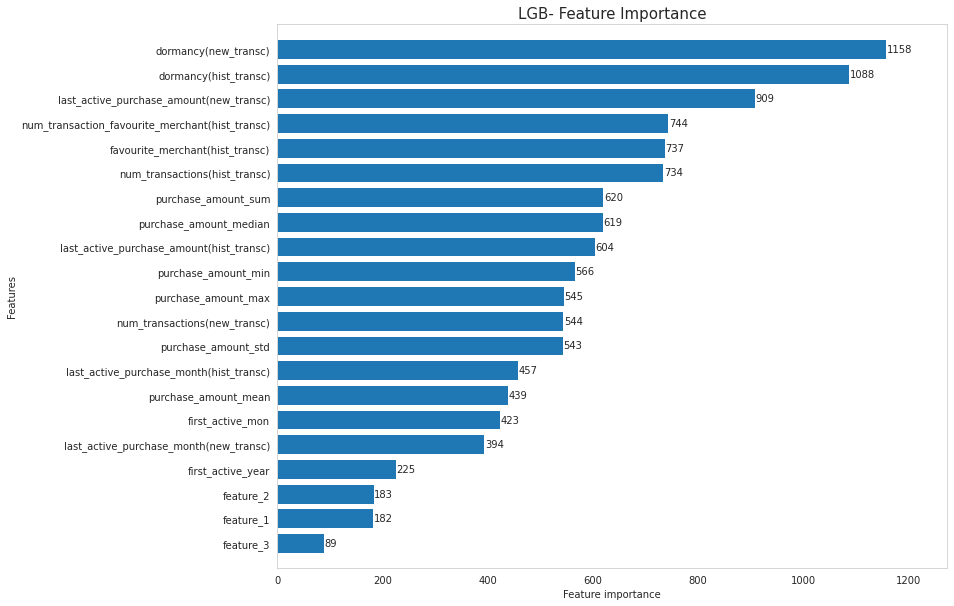

In [ ]:
# Feature Importance 
fig, ax = plt.subplots(figsize=(12,10))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LGB- Feature Importance", fontsize=15);

**Summary of the baseline model created :**

* My approach for the baseline model is totally based on my understanding of business problem. I thought what could be the features which are really crucial in this domain on which loyalty of a customer depends. At first hand, I came up with the features num_of_transactions, purchase_amount, favourite merchant,
num of transactions at favourite merchant including some date-time features like first_active month, purchase_date and dormancy (Inactive period of card). Though most of these features are not explicitly given in the data, I had to derive these all with feature engineering. The model gives 3.72 as RMSE score on train data, and this is fairly good acknowledging the fact that data contains outliers and we cant remove them.

**Observation :**

* We can see dormancy, last purchase amount, favourite merchant, no of transactions at favourite merchant, num of transactions are the most important features. So from Baseline model, we can interpret these fetures have more impact in calculation of loyalty score.

* I definitely involve all these important features for further modelling with advance feature enginnering.

In [ ]:
submit_df = pd.read_csv('/content/sample_submission.csv')
submit_df["target"] = pred_test
submit_df.to_csv("submission_baseline_lgb.csv", index=False)
submit_df.head()

,card_id,target
0,C_ID_0ab67a22ab,-1.049833
1,C_ID_130fd0cbdd,-0.445194
2,C_ID_b709037bc5,0.473465
3,C_ID_d27d835a9f,-0.233277
4,C_ID_2b5e3df5c2,-0.715105


Score in Kaggle :


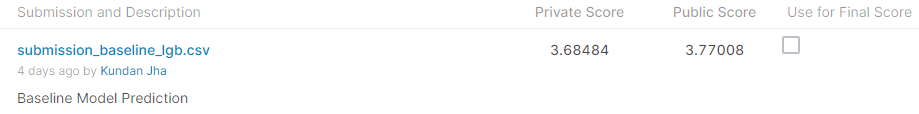

In [ ]:
from IPython.display import Image
print("Score in Kaggle :")
Image("/content/drive/MyDrive/Case study1/Baseline_Score.png")

<h3>Feature Engineering : (part-2)</h3>

In this block, we are doing advance feature engineering.

**One-hot Encoding : For categorical variables**

There are category features in the historical and new_merchants transactions should be one hot encoded transactions before accumulating the data to create features.

In [ ]:
def oneHotEncoding(df, features):
  '''This function is for one-hot encoding the categorical features
  parameters:
  df: DataFrame
  features: Features needs to be one hot encoded.'''

  for feat in tqdm(features):
    unique_values = df[feat].unique()

    for cat in unique_values:
      df[feat+'={}'.format(cat)] = (historical_data[feat] == cat).astype(int)

# The categorical features
categorical_features = ['category_2','category_3','month_lag']

## one-hot encoding historical transactions 
oneHotEncoding(historical_data, features=categorical_features)

## one-hot encoding new merchants transactions
oneHotEncoding(newmerchant_data, features=categorical_features)


100%|██████████| 3/3 [00:06<00:00,  2.16s/it]


**Aggregated Features :**

The card_id is the primary key in the train and test data, so the features from transactions should be aggregated with card_id features.


In [ ]:
def aggregated_features(new_df, df, aggs, grpby, name='',  prefix='', use_col=False):
  '''
  This function is to find the 
  aggregated values (sum,min,max,std,median,mean,nunique) for a columns aggregated by the groupby operation
  
  Parameters:
  new_df   - features will be added to this DF
  df       - original DF from which the features will be created
  grpby    - based on this column we'll to group by
  name     - name for the new features created
  aggs     - dictionary contains key as the column the operation performed and list of operations as the value.
  prefix   - added to the name of the feature -- default value empty
  use_col  - if set True then the original column name will be uesd to name the new feature -- default value False
  '''
  # boolean for using the original column name in the aggregated features
  # iterating through the columns of the need to be aggregated 

  for col, funcs in tqdm(aggs.items()):
    for func in funcs:
        # Getting the name of aggregation function
        if isinstance(func, str):
            func_str = func
        else:
            func_str = func.__name__ 
        # create the column
        if use_col:
          name = prefix+'_'+col+'_'+'{}'.format(func_str)

        new_df[name] = df.groupby([grpby])[col].agg(func).values

  return new_df

**1. Aggregation all the id's :**

The id features can be aggregated to understand the number users spread acros the different identifiers. if a card_id has large unique number city id's on thier transactions, there is high chance the user is loyal towards the brand.

In [ ]:
aggs = {'city_id':['nunique'],
        'state_id' :['nunique'],
        'merchant_category_id':['nunique'],
        'subsector_id':['nunique'],
        'merchant_id':['nunique']}

# In historical_transactions        
features_historical = aggregated_features(features_historical, historical_data, aggs, grpby='card_id',prefix='hist_transc', use_col=True)

# In new_merch_transactions 
features_newmerch = aggregated_features(features_newmerch, newmerchant_data, aggs, grpby='card_id',prefix='new_transc', use_col=True)

100%|██████████| 5/5 [00:07<00:00,  1.52s/it]


**2. Aggregation Installment feature :**

For installment feature all the aggregate features can be calculated because it is a ordianl numerical feature. Installments are one key aspects looks into credit score of the user. The credit Score can help in reveling the insights for loyalty.

In [ ]:
aggs = {'installments':['mean', 'sum', 'max', 'min', 'std', 'skew']}

# In historical_transactions        
features_historical = aggregated_features(features_historical, historical_data, aggs, grpby='card_id',prefix='hist_transc', use_col=True)

# In new_merch_transactions
features_newmerch = aggregated_features(features_newmerch, newmerchant_data, aggs, grpby='card_id',prefix='new_transc', use_col=True)

100%|██████████| 1/1 [00:54<00:00, 54.65s/it]


**3. Aggregation purchase_amount feature :**

The purchase_amount is normalized with some added noise to anomonyize it. From the reference of kaggle discussion of raddar, we can transform the purchase_amount into it's observed value.


In [ ]:
## Transforming the purchase amount
# Reference: https://www.kaggle.com/raddar/towards-de-anonymizing-the-data-some-insights

# In historical_transactions        
historical_data['purchase_amount'] = np.round(historical_data['purchase_amount'] / 0.00150265118 + 497.06, 2)

# In new_merch_transactions
newmerchant_data['purchase_amount'] = np.round(newmerchant_data['purchase_amount'] / 0.00150265118 + 497.06, 2)

The Purchase_amount is a numerical features, so all the basic aggregations are done to create new features.

In [ ]:
aggs = {'purchase_amount':['sum', 'mean', 'max', 'min', 'median', 'std', 'skew']}

# In historical_transactions 
features_historical = aggregated_features(features_historical, historical_data, aggs, grpby='card_id', prefix='hist_transc', use_col=True)

# In new_merch_transactions
features_newmerch = aggregated_features(features_newmerch, newmerchant_data, aggs, grpby='card_id', prefix='new_transc', use_col=True)

100%|██████████| 1/1 [00:44<00:00, 44.03s/it]


**4. Aggregation month_lag feature :**

The simple statistical features are created from column month_lag.

In [ ]:
aggs = {'month_lag': ['nunique', 'mean', 'std', 'min', 'max', 'skew']}

# In historical_transactions 
features_historical = aggregated_features(features_historical, historical_data, aggs, grpby='card_id',prefix='hist_transc', use_col=True)

# In new_merch_transactions
features_newmerch = aggregated_features(features_newmerch, newmerchant_data, aggs, grpby='card_id',prefix='new_transc', use_col=True)

100%|██████████| 1/1 [00:54<00:00, 54.71s/it]


**5. Aggregation purchase_date feature :**

The purchase_date is the important time feature in transactions which gives the time_stamp of the purchases.

In [ ]:
# In historical_transactions 
historical_data['purchase_date'] = pd.to_datetime(historical_data['purchase_date'])

# In new_merch_transactions
newmerchant_data['purchase_date'] = pd.to_datetime(newmerchant_data['purchase_date'])

In [ ]:
aggs = {'purchase_date': ['max','min']}

# In historical_transactions 
features_historical = aggregated_features(features_historical, historical_data, aggs, grpby='card_id',prefix='hist_transc', use_col=True)

# In new_merch_transactions
features_newmerch = aggregated_features(features_newmerch, newmerchant_data, aggs, grpby='card_id',prefix='new_transc', use_col=True)

100%|██████████| 1/1 [00:01<00:00,  1.62s/it]


**6. Aggregation category_1 & authorized_flag features :**

The category_1 Feature is a binary feature which can aggregated using the count of 1 and 0 in the transactions data for each card_id and other features like mean and std can be calculated for the category_1 feature.

The Authorized_flag feature just like category_1, it is a binary feature which can as same a category_1.

In [ ]:
aggs = {'category_1':['sum', 'mean'],
        'authorized_flag': ['sum', 'mean']}

# In historical_transactions 
features_historical = aggregated_features(features_historical, historical_data, aggs, grpby='card_id',prefix='hist_transc', use_col=True)

# In new_merch_transactions
features_newmerch = aggregated_features(features_newmerch,newmerchant_data, aggs, grpby='card_id',prefix='new_transc', use_col=True)

100%|██████████| 2/2 [00:03<00:00,  1.61s/it]


**7. Aggregation category_2 & category_3 features :**

The feature category_2 and category_3 is a categorical feature with 5 unique values. And, In The category_2 feature is already one-hot coded, So for each category of category_2 feature the mean, sum and std can be calculated.

In [ ]:
aggs = {'category_2=1.0':['sum', 'mean'],
        'category_2=2.0':['sum', 'mean'],
        'category_2=3.0':['sum', 'mean'],
        'category_2=4.0':['sum', 'mean'],
        'category_2=5.0':['sum', 'mean'],
        'category_3=1.0':['sum', 'mean'],
        'category_3=2.0':['sum', 'mean'],
        'category_3=3.0':['sum', 'mean']}

# In historical_transactions 
features_historical = aggregated_features(features_historical, historical_data, aggs, grpby='card_id',prefix='hist_transc', use_col=True)

# In new_merch_transactions
features_newmerch = aggregated_features(features_newmerch, newmerchant_data, aggs, grpby='card_id',prefix='new_transc', use_col=True)

100%|██████████| 8/8 [00:12<00:00,  1.60s/it]


**Derived Features : from existing features**

Now, There are some abstract crucial features which can be really important for predicting loyality of customer towards the brand. We have to derive those features with feature engineering techniques. 

**1. Derived features from card_id : Number of transactions**

Transaction count is an important info about the customer in prediction of loyality.

In [ ]:
# historical_transactions 
features_historical = pd.DataFrame(historical_data.groupby(['card_id']).size()).reset_index()
features_historical.columns = ['card_id', 'hist_transc_count']

# new_merchant_transactions 
features_newmerch = pd.DataFrame(newmerchant_data.groupby(['card_id']).size()).reset_index()
features_newmerch.columns = ['card_id', 'new_transc_count']

Authorized_flag : The number of authorized transaction and denied transaction can be found by summing up the authorized_flag values and subracting it from the total count of transactions.

In [ ]:
## authorized_flag

# historical_transactions
features_historical['hist_transc_denied_count'] = features_historical['hist_transc_count'].values - \
                                                    features_historical['hist_transc_authorized_flag_sum'].values

# new_merchant_transactions
features_newmerch['new_transc_denied_count'] = features_newmerch['new_transc_count'].values - \
                                                    features_newmerch['new_transc_authorized_flag_sum'].values

category_1 : The number of 0's and 1's are found by summming up the category_1 values and subracting it from the total count of transactions.

In [ ]:
## category_1

# historical_transactions
features_historical['hist_transc_category_1_sum_0'] = features_historical['hist_transc_count'].values - \
                                                              features_historical['hist_transc_category_1_sum'].values

# new_merchant_transactions
features_newmerch['new_transc_category_1_sum_0'] = features_newmerch['new_transc_count'].values - \
                                                            features_newmerch['new_transc_category_1_sum'].values

merchant_id : For merchant_id, we need info for each card_id, how many merchants are used by the card_id's. we are calculating count mean of transactions per card_id.

In [ ]:
## find mean of the count of the transac for merchant id

# historical_transactions
features_historical['hist_transc_merchant_id_count_mean'] = features_historical['hist_transc_count'].values \
                                                                    / (1.0+features_historical['hist_transc_merchant_id_nunique'].values)

# new_merchant_transactions
features_newmerch['new_transc_merchant_id_count_mean'] = features_newmerch['new_transc_count'].values \
                                                              / (1.0+features_newmerch['new_transc_merchant_id_nunique'].values)

**2. Derived features from purchase_date :**

The purchase_date is the important time feature in transactions which gives the time_stamp of the purchases.

Difference in the max and min purchase_dates for a card_id and purchase_count ratio.

purchase_count_ratio is defined by total number of transactions divided by time period of between max and min date of purchase.

In [ ]:
## In historical_transactions
# diff in purchase_date from max to min 
features_historical['hist_transc_purchase_date_diff'] = (features_historical['hist_transc_purchase_date_max'] - features_historical['hist_transc_purchase_date_min']).dt.days.values

# purchase_count_ratio
features_historical['hist_transc_purchase_count_ratio'] = features_historical['hist_transc_count'].values / (1.0 + features_historical['hist_transc_purchase_date_diff'].values)

## In new_merch_transactions
# diff in purchase_date from max to min 
features_newmerch['new_transc_purchase_date_diff'] = (features_newmerch['new_transc_purchase_date_max'] - features_newmerch['new_transc_purchase_date_min']).dt.days.values

# purchase_count_ratio
features_newmerch['new_transc_purchase_count_ratio'] = features_newmerch['new_transc_count'].values / (1.0 + features_newmerch['new_transc_purchase_date_diff'].values)

Next, Some features about day of the purchase.

* Whether the purchase_date is on weekday or weekend by is_weekend feature. Since, the is_weekend is a binary feature, we can aggeregate the feature with simple stats mean,max,sum etc.

In [ ]:
#is_weekend is a feature which purchase_date is weekend or weekday.
#greater than 5 to check whether the day is sat or sunday then, if it is then assign a val 1 else 0

## In historical_transactions 
historical_data['is_weekend'] = historical_data['purchase_date'].dt.dayofweek
historical_data['is_weekend'] = historical_data['is_weekend'].apply(lambda x: 1 if x >= 5 else 0).values

## In new_merch_transactions
newmerchant_data['is_weekend'] = newmerchant_data['purchase_date'].dt.dayofweek
newmerchant_data['is_weekend'] = newmerchant_data['is_weekend'].apply(lambda x: 1 if x >= 5 else 0).values


# aggregate features for is_weekend 
aggs = {'is_weekend': ['sum','mean']}

# In historical_transactions 
features_historical = aggregated_features(features_historical, historical_data, aggs, grpby='card_id',prefix='purchase_is_weekend_', use_col=True)

# In new_merch_transactions
features_newmerch = aggregated_features(features_newmerch, newmerchant_data, aggs, grpby='card_id',prefix='purchase_is_weekend_', use_col=True)

100%|██████████| 1/1 [00:01<00:00,  1.71s/it]


Extracting the day, hour, week from the purchase_date feature

In [ ]:
## extracting the day, hour, week from the purchase_date.

# In historical_transactions
historical_data['purchase_date_week'] = historical_data['purchase_date'].dt.week.values
historical_data['purchase_date_dayofweek'] = historical_data['purchase_date'].dt.dayofweek.values
historical_data['purchase_date_hour'] = historical_data['purchase_date'].dt.hour.values

# In new_merch_transactions
newmerchant_data['purchase_date_week'] = newmerchant_data['purchase_date'].dt.week.values
newmerchant_data['purchase_date_dayofweek'] = newmerchant_data['purchase_date'].dt.dayofweek.values
newmerchant_data['purchase_date_hour'] = newmerchant_data['purchase_date'].dt.hour.values

## aggregated features on  day, hour , week
aggs = {'purchase_date_week': ['nunique', 'mean', 'min', 'max'],
        'purchase_date_dayofweek': ['nunique', 'mean', 'min', 'max'],
        'purchase_date_hour':['nunique', 'mean', 'min', 'max']}

# In historical_transactions
features_historical = aggregated_features(features_historical, historical_data, aggs, grpby='card_id',prefix='hist_transc', use_col=True)

# In new_merch_transactions
features_newmerch = aggregated_features(features_newmerch, newmerchant_data, aggs, grpby='card_id',prefix='new_transc', use_col=True)

100%|██████████| 3/3 [00:12<00:00,  4.15s/it]


Month_diff is another feature which can dervied from the purchase_date feature. Since, all the transactions occurs in 2017 - 2018. But taking the last day of 2018 year as the reference date and find the number of months between the reference_date and purchase_date. This month_difference reveals the recency and frequency of the purchases.

In [ ]:
reference_date = '2018-12-31'
reference_date = pd.to_datetime(reference_date)

## calcuating month difference

# In historical_transactions 
historical_data['month_diff'] = (reference_date - historical_data['purchase_date']).dt.days // (30 + historical_data['month_lag'])
# In new_merch_transactions
newmerchant_data['month_diff'] = (reference_date - newmerchant_data['purchase_date']).dt.days // (30 + newmerchant_data['month_lag'])

## calculating the aggerated features like ['mean', 'min', 'max'] for month_diff column.
aggs = {'month_diff': ['mean', 'min', 'max']}

# In historical_transactions 
features_historical = aggregated_features(features_historical, historical_data, aggs, grpby='card_id', prefix='hist_transc', use_col=True)
# In new_merch_transactions
features_newmerch = aggregated_features(features_newmerch, newmerchant_data, aggs, grpby='card_id', prefix='new_transc', use_col=True)

100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


The ratio of purchase amount by month_diff is another feature which help to reveal the card_id's financial capcity and purchase_pattern.

The 1 is added in the denominator to nullify the division by zero error.

In [ ]:
# In historical_transactions 
historical_data['amount_month_ratio'] = historical_data['purchase_amount'].values / (1.0 + historical_data['month_diff'].values)

# aggregated features on the amount ratio and month_lag.
aggs = {'amount_month_ratio': ['mean', 'std', 'min', 'max', 'skew'],
        'month_lag=0': ['sum','mean'],
        'month_lag=-1':['sum','mean'],
        'month_lag=-2':['sum','mean']}

features_historical = aggregated_features(features_historical, historical_data, aggs, grpby='card_id',prefix='hist_transc', use_col=True)

# In new_merch_transactions
newmerchant_data['amount_month_ratio'] = newmerchant_data['purchase_amount'].values / (1.0 + newmerchant_data['month_diff'].values)

# aggregated features on the amount ratio and month_lag.
aggs = {'amount_month_ratio': ['mean', 'std', 'min', 'max', 'skew'],
        'month_lag=1': ['sum','mean'],
        'month_lag=2':['sum','mean']}

features_newmerch = aggregated_features(features_newmerch, newmerchant_data, aggs, grpby='card_id',prefix='new_transc', use_col=True)

100%|██████████| 3/3 [00:45<00:00, 15.30s/it]


New merchants data only have two month lags 1 and 2, so we can do simple ratio on it for an another feature. And, the same can be done on the historical transactions as well.

In [ ]:
# month_lag ratio in historical transactions
features_historical['hist_transc_month_lag_0_-1_ratio'] = features_historical['hist_transc_month_lag=0_sum'] \
                                                                  / (1.0 + features_historical['hist_transc_month_lag=-1_sum'])

features_historical['hist_transc_month_lag_0_-2_ratio'] = features_historical['hist_transc_month_lag=0_sum'] \
                                                                  / (1.0 + features_historical['hist_transc_month_lag=-2_sum'])

# ratio of the summed month lags with the transaction count
tmp = features_historical[['hist_transc_month_lag=0_sum','hist_transc_month_lag=-1_sum','hist_transc_month_lag=-2_sum']].sum(axis=1)

features_historical['hist_transc_month_lag_sum_ratio'] = tmp / (1.0 + features_historical['hist_transc_count'])

# month_lag ratio between two month_lags.
features_newmerch['new_transc_month_lag_1_2_ratio'] = features_newmerch['new_transc_month_lag=1_sum'] \
                                                                  / (1.0 + features_newmerch['new_transc_month_lag=2_sum'])

**3. Derived features from purchase_amount :**

The Purchase amount is one feature which can be aggregated to find money spend by each card_id with ELO.


In [ ]:
## difference in the amount spend with cards

# In historical_transactions 
features_historical['hist_transc_amount_diff'] = features_historical['hist_transc_purchase_amount_max'].values - features_historical['hist_transc_purchase_amount_min'].values

# In new_merch_transactions
features_newmerch['new_transc_amount_diff'] = features_newmerch['new_transc_purchase_amount_max'].values - features_newmerch['new_transc_purchase_amount_min'].values

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
features_historical = pd.read_csv('/content/drive/MyDrive/Case study1/features_historical_2.csv')
features_newmerch = pd.read_csv('/content/drive/MyDrive/Case study1/features_newmerch_2.csv')

**Derived Features : Features from Baseline Model**

Based on the feature importance of baseline model, we can include its top features.  

**1. Transform first_active_month and extract year and month :**

In [ ]:
# In historical_transactions 
train_data['first_active_month'] = pd.to_datetime(train_data['first_active_month'])

# In new_merch_transactions
test_data['first_active_month'] = pd.to_datetime(test_data['first_active_month'])


for df in [train_data, test_data]:
    # extracting the year and month
    df['first_active_year'] = df['first_active_month'].dt.year.values
    df['first_active_mon'] = df['first_active_month'].dt.month.values

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Encode first_active_year column
train_data['first_active_year'] = le.fit_transform(train_data['first_active_year'] )
test_data['first_active_year'] = le.fit_transform(test_data['first_active_year'] )

# Encode first_active_mon column
train_data['first_active_mon'] = le.fit_transform(train_data['first_active_mon'] )
test_data['first_active_mon'] = le.fit_transform(test_data['first_active_mon'] )

**2. Derive last purchase amount, last active month and dormancy feature :**

In [ ]:
## For historical transaction
historical_data['purchase_date'] = pd.to_datetime(historical_data['purchase_date'])

# last active month & last purchase amount
last_active_month = historical_data.loc[historical_data.groupby('card_id').purchase_date.idxmax(),:][['card_id','purchase_date','purchase_amount']]
last_active_month.columns = ['card_id','hist_transc_last_active_purchase_date','hist_transc_last_active_purchase_amount']
train_data = pd.merge(train_data,last_active_month, on="card_id",how='left')
test_data = pd.merge(test_data,last_active_month, on="card_id",how='left')

train_data['hist_transc_last_active_purchase_month'] = train_data['hist_transc_last_active_purchase_date'].dt.month
test_data['hist_transc_last_active_purchase_month'] = test_data['hist_transc_last_active_purchase_date'].dt.month

# dormancy feature
max_purchase_date_hist = historical_data['purchase_date'].max()
train_data['hist_transc_dormancy'] = [(max_purchase_date_hist-x).days for x in train_data['hist_transc_last_active_purchase_date']]
test_data['hist_transc_dormancy'] = [(max_purchase_date_hist-x).days for x in test_data['hist_transc_last_active_purchase_date']]
train_data.head()

## For new_merchant_transaction
newmerchant_data['purchase_date'] = pd.to_datetime(newmerchant_data['purchase_date'])

# last active month & last purchase amount
last_active_month = newmerchant_data.loc[newmerchant_data.groupby('card_id').purchase_date.idxmax(),:][['card_id','purchase_date','purchase_amount']]
last_active_month.columns = ['card_id','new_transc_last_active_purchase_date','new_transc_last_active_purchase_amount']
train_data = pd.merge(train_data, last_active_month, on="card_id",how='left')
test_data = pd.merge(test_data, last_active_month, on="card_id",how='left')

train_data['new_transc_last_active_purchase_month'] = train_data['new_transc_last_active_purchase_date'].dt.month
test_data['new_transc_last_active_purchase_month'] = test_data['new_transc_last_active_purchase_date'].dt.month

# dormancy feature
max_purchase_date_newmer = newmerchant_data['purchase_date'].max()
train_data['new_transc_dormancy'] = [(max_purchase_date_newmer-x).days for x in train_data['new_transc_last_active_purchase_date']]
test_data['new_transc_dormancy'] = [(max_purchase_date_newmer-x).days for x in test_data['new_transc_last_active_purchase_date']]
test_data.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,first_active_year,first_active_mon,hist_transc_last_active_purchase_date,hist_transc_last_active_purchase_amount,hist_transc_last_active_purchase_month,hist_transc_dormancy,new_transc_last_active_purchase_date,new_transc_last_active_purchase_amount,new_transc_last_active_purchase_month,new_transc_dormancy
0,2017-04-01,C_ID_0ab67a22ab,3,3,1,6,3,2017-12-29 01:05:24,25.0,12,61,2018-02-28 19:08:52,16.5,2.0,61.0
1,2017-01-01,C_ID_130fd0cbdd,2,3,0,6,0,2018-02-18 21:30:11,47.0,2,10,2018-04-20 18:00:17,160.0,4.0,10.0
2,2017-08-01,C_ID_b709037bc5,5,1,1,6,7,2018-02-02 18:57:03,759.8,2,26,2018-03-13 13:10:46,15.0,3.0,48.0
3,2017-12-01,C_ID_d27d835a9f,2,1,0,6,11,2018-02-20 11:42:39,10.0,2,8,2018-04-17 21:22:23,50.0,4.0,13.0
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1,4,11,2018-02-27 10:42:04,30.0,2,1,2018-04-12 12:13:11,825.0,4.0,18.0


**3. Deriving Favourite merchant and Number of transactions at Favourite merchant as feature :**

In [ ]:
# For historical transaction
merchantid_counts_percard = pd.DataFrame(historical_data[['card_id','merchant_id']].groupby(['card_id','merchant_id']).size())
merchantid_counts_percard.columns = ['num_favourite_merchant']
merchantid_counts_percard = merchantid_counts_percard.sort_values(by='num_favourite_merchant',ascending=False)
merchantid_counts_percard = merchantid_counts_percard.groupby(level=0).head(1).reset_index()
merchantid_counts_percard.columns = ['card_id','hist_transc_favourite_merchant','hist_transc_num_transaction_favourite_merchant']
train_data = pd.merge(train_data ,merchantid_counts_percard, on="card_id",how='left')
test_data = pd.merge(test_data ,merchantid_counts_percard, on="card_id",how='left')


In [ ]:
# Encode Favourite merchant column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_data['hist_transc_favourite_merchant'] = le.fit_transform(train_data['hist_transc_favourite_merchant'] )
test_data['hist_transc_favourite_merchant'] = le.fit_transform(test_data['hist_transc_favourite_merchant'] )

In [ ]:
# For new_merchant_transaction
merchantid_counts_percard = pd.DataFrame(newmerchant_data[['card_id','merchant_id']].groupby(['card_id','merchant_id']).size())
merchantid_counts_percard.columns = ['num_favourite_merchant']
merchantid_counts_percard = merchantid_counts_percard.sort_values(by='num_favourite_merchant',ascending=False)
merchantid_counts_percard = merchantid_counts_percard.groupby(level=0).head(1).reset_index()
merchantid_counts_percard.columns = ['card_id','new_transc_favourite_merchant','new_transc_num_transaction_favourite_merchant']
train_data = pd.merge(train_data ,merchantid_counts_percard, on="card_id",how='left')
test_data = pd.merge(test_data ,merchantid_counts_percard, on="card_id",how='left')

We have nan values in column 'new_transc_favourite_merchant'. we have to impute its value.

In [ ]:
train_data['new_transc_favourite_merchant'].fillna('M_ID_00a6ca8a8a',inplace=True)
train_data['new_transc_favourite_merchant'].isna().any()

False

In [ ]:
test_data['new_transc_favourite_merchant'].fillna('M_ID_00a6ca8a8a',inplace=True)
test_data['new_transc_favourite_merchant'].isna().any()

False

In [ ]:
# Encode Favourite merchant column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_data['new_transc_favourite_merchant'] = le.fit_transform(train_data['new_transc_favourite_merchant'] )
test_data['new_transc_favourite_merchant'] = le.fit_transform(test_data['new_transc_favourite_merchant'] )

**4. Holidays : Influential days**

In the following cell we will create influential days features.

What the below code does is that it will find whether a purchase is made 15 days before a festival. If it is so then it will be consider as an influential day.

Based on this feature now we'll create new features by finding basic stats like finding the mean for each of the holiday columns like christmas, fathers day etc.

In [ ]:
# Refer : https://www.kaggle.com/delayedkarma/let-s-add-some-features-for-the-national-holidays

holidays = {'FathersDay_2017': '2017-08-13',
            'ChildrenDay_2017':'2017-10-12',
            'BlackFriday_2017':'2017-11-24',
            'ValentineDay_2017':'2017-06-12',
            'Republicday_2017':'2017-11-15',
            'Independenceday_2017':'2017-09-7',
            'EasterDay_2017' : '2017-04-16',
            'AllSoulsDay_2017': '2017-11-2',
            'ChristmasDay_2017': '2017-12-25'}

# In historical_transactions 
for day, date in holidays.items():
  historical_data[day] = (pd.to_datetime(date) - historical_data['purchase_date']).dt.days
  historical_data[day] = historical_data[day].apply(lambda x: x if x > 0 and x < 15 else 0)

# aggregation of holidays
aggs = dict(zip(holidays.keys(),[['mean'] for x in holidays.keys()]))

features_historical = aggregated_features(features_historical, historical_data, aggs, grpby='card_id',prefix='hist_transc', use_col=True)

100%|██████████| 9/9 [00:20<00:00,  2.28s/it]


In [ ]:
# new_transactions
for day, date in holidays.items(): 
  newmerchant_data[day] = (pd.to_datetime(date) - newmerchant_data['purchase_date']).dt.days
  newmerchant_data[day] = newmerchant_data[day].apply(lambda x: x if x > 0 and x < 15 else 0)

# aggregation of holidays
aggs = dict(zip(holidays.keys(),[['mean'] for x in holidays.keys()]))

features_newmerch = aggregated_features(features_newmerch, newmerchant_data, aggs, grpby='card_id',prefix='new_transc', use_col=True)

100%|██████████| 9/9 [00:05<00:00,  1.76it/s]


In [ ]:
features_historical.to_csv("features_historical_3.csv", index=False)
features_newmerch.to_csv("features_newmerch_3.csv", index=False)
!cp features_historical_3.csv "/content/drive/MyDrive/Case study1"
!cp features_newmerch_3.csv "/content/drive/MyDrive/Case study1"

**5. Target : Outlier Feature**

Since train and test df's have target values. As seen in the train and test data eda, target value has outliers. We can make the outliers as the binary feature whether card's target value is outliers or not.

In [ ]:
train_data['outliers'] = 0
train_data[train_data['target'] < -30]['outliers'] = 1

**Feature Engineering (What all have been done) :**

I seperated all my features into 4 main categories :

**1. One-hot Encoding : For categorical variables**

* There are category features in the historical and new_merchants transactions should be one hot encoded transactions before accumulating the data to create features.

**2. Aggregated Features :** 

* There are features on which I have performed the aggregation task i.e. min, max, median, min, sum, standard deviation to collect all the aspects of that feature.

**3. Derived Features :**

* There are some abstract crucial features which can be really important for predicting loyality of customer towards the brand. We have to derive those features from existing feature with feature engineering techniques.

**4. Features from Baseline Model :**

* The baseline model which I have created is totally based on the human understanding of buisness problem. I cameup with some basic features which I had thought will be really important in real situations to predict customer's loyality. Then I train a simple model and check the feature importance, and in this part I include all the topmost features of the baseline model.

**Summary of all the features created :**

1) Creating features out of the date columns like adding whether it is a weekday, weekend, any special festive day or holiday, difference between dates, first and last registered dates. Could also engineer a feature like if a purchase is made within days before or after a festival then we can call it an influential day for making a purchase.

2) Sum, mean, max, min, median, std of the transaction amount of each card_id

3) The statistical features like finding min, max, difference, average, percentiles of the time difference of the card_id transaction.

4) Transaction count and success and failure count for each card_id (classified by authorized_flag)

5) Creating new features by feature interaction like summing two features, taking ratio etc.

6) The ratio of weekends and working days for each card_id transaction Creating agg. features grouped by card_id and like finding the count of the purchases a particular card_id made during weekend etcetera and perform typical aggregate features like avg, min, max.

7) Features out of categorical features. For instance, there is this feature called authorized_flag takes two values (‘Y’ or ‘N’) which indicate whether a transaction is authorized or not. We can map the Y or N to 1 and 0 and we can find the sum of that column grouped by card_id. This will give us how many transactions are authorized for a particular card_id.

8) category_1, category_2, and category_3 are subjected to one-hot conversion and finding the mean and sum for each column separately.

**Merging the new features with the train and test Data :**

In [ ]:
from functools import reduce
# Merging the new features with the train and test Data
# Reference : https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
train = reduce(lambda left,right: pd.merge(left,right,on='card_id', how='left'), [train_data, features_historical, features_newmerch])

test  = reduce(lambda left,right: pd.merge(left,right,on='card_id', how='left'), [test_data, features_historical, features_newmerch])

In [ ]:
train.to_csv("features_train.csv", index=False)
test.to_csv("features_test.csv", index=False)
!cp features_train.csv "/content/drive/MyDrive/Case study1"
!cp features_test.csv "/content/drive/MyDrive/Case study1"

In [5]:
train = pd.read_csv('/content/drive/MyDrive/Case study1/features_train.csv', index_col='card_id')
test = pd.read_csv('/content/drive/MyDrive/Case study1/features_test.csv', index_col='card_id')

In [6]:
remove_cols = ['first_active_month','new_transc_purchase_date_max',
 'new_transc_purchase_date_min','hist_transc_purchase_date_max',
 'hist_transc_purchase_date_min', 'hist_transc_last_active_purchase_date', 'new_transc_last_active_purchase_date']

In [7]:
test = test.drop(labels=remove_cols, axis = 1)
train = train.drop(labels=remove_cols, axis = 1)

In [8]:
print('The shape of featured train data :',train.shape)
print('The shape of featured test data :',test.shape)

The shape of featured train data : (201917, 195)
The shape of featured test data : (123623, 193)


The two extra features in train data are target and outlier feature.

**Validation train and test split :**

In [9]:
# splitting train and target values
y_train = train['target']

X = train.drop(['target'],axis=1)

outliers = X['outliers']

X_train = X.drop(['outliers'],axis = 1)

**Model : XGBOOST**

In [10]:
!python -m pip install xgboost --user --upgrade pip

     |████████████████████████████████| 166.7MB 88kB/s 
     |████████████████████████████████| 1.6MB 43.2MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Hyperparameter tuning using **RandomizedSearchCV :**

In [ ]:
%%time
import xgboost as xgb
from scipy.stats import randint as sp_randint
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold

# intializing the model
xgb = xgb.XGBRegressor(learning_rate=0.01, n_estimators=100, objective= 'reg:linear', \
                       eval_metric ='rmse', silent=True, nthread=8, tree_method='gpu_hist')

# intializing the parameters
parameters = {
         'num_boost_round': [10, 25, 50], 'eta': [0.05, 0.1, 0.3],
         'max_depth': [3, 4, 5, 6,], 'subsample':[i/10.0 for i in range(6,10)],
         'colsample_bytree':[i/10.0 for i in range(6,10)], "min_samples_split": sp_randint(2, 11),
         "min_samples_leaf": sp_randint(1, 11), "min_child_weight": range(1,6,2),
         'gamma':[i/10.0 for i in range(0,5)], 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
              }

# Randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(xgb, param_distributions=parameters, \
                cv=StratifiedKFold(n_splits=9, random_state=1989).split(X_train,outliers.values),\
                 n_jobs=-1, n_iter=30, verbose=3)

random_search.fit(X_train, y_train)

Fitting 9 folds for each of 30 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 10.6min finished


CPU times: user 38.2 s, sys: 5.35 s, total: 43.5 s
Wall time: 10min 37s


In [ ]:
#printing the best parameters got from the RandomizedSearchCV.
random_search.best_params_

{'colsample_bytree': 0.9,
 'eta': 0.1,
 'gamma': 0.1,
 'max_depth': 6,
 'min_child_weight': 3,
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'num_boost_round': 50,
 'reg_alpha': 1e-05,
 'subsample': 0.9}

**XGBOOST with best hyperparameters :**

In [ ]:
xgb_params = {
              'eta': 0.1, 'max_depth': 6, 'subsample': 0.9, 'colsample_bytree': 0.9, \
              'learning_rate':0.01, 'gamma':0.1, 'min_samples_leaf' : 6, 'min_samples_split': 5, \
              'num_boost_round': 50, 'reg_alpha': 1e-05,'objective': 'reg:linear', 'eval_metric': 'rmse', \
              'silent': True, 'tree_method':'gpu_hist', 'min_child_weight': 3
              }

predictions_xgb_train = np.zeros(len(X_train))
predictions_xgb_test = np.zeros(len(test))

# prepare fit model with cross-validation
FOLDs = KFold(n_splits=9, shuffle=True, random_state=1989)

for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(X_train,outliers.values)):
    
    # xgb dataset intializing the data
    trn_data = xgb.DMatrix(data=X_train.iloc[trn_idx], label=y_train.iloc[trn_idx])
    val_data = xgb.DMatrix(data=X_train.iloc[val_idx], label=y_train.iloc[val_idx])
    watchlist = [(trn_data, 'train'), (val_data, 'valid')]
    print("xgb " + str(fold_) + "-" * 50)
    num_round = 10000
    
    # intializing the model
    xgb_model = xgb.train(xgb_params, trn_data, num_round, watchlist, \
                          early_stopping_rounds=200, verbose_eval=200)
    
    # prediction on train data
    predictions_xgb_train[val_idx] = xgb_model.predict(xgb.DMatrix(X_train.iloc[val_idx]), ntree_limit=xgb_model.best_ntree_limit+50)

    # prediction on test data
    predictions_xgb_test  = predictions_xgb_test + xgb_model.predict(xgb.DMatrix(test), ntree_limit=xgb_model.best_ntree_limit+50) / FOLDs.n_splits



xgb 0--------------------------------------------------
[0]	train-rmse:3.9272	valid-rmse:4.10743
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 200 rounds.
[200]	train-rmse:3.5711	valid-rmse:3.83769
[400]	train-rmse:3.48453	valid-rmse:3.81323
[600]	train-rmse:3.42851	valid-rmse:3.8069
[800]	train-rmse:3.38098	valid-rmse:3.80606
[1000]	train-rmse:3.33787	valid-rmse:3.80603
Stopping. Best iteration:
[991]	train-rmse:3.3399	valid-rmse:3.80592

xgb 1--------------------------------------------------
[0]	train-rmse:3.95978	valid-rmse:3.84873
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 200 rounds.
[200]	train-rmse:3.60079	valid-rmse:3.5841
[400]	train-rmse:3.51026	valid-rmse:3.56943
[600]	train-rmse:3.45216	valid-rmse:3.56614
[800]	train-rmse:3.40272	valid-rmse:3.56572
[1000]	train-rmse:3.35906	valid-rmse:3.56555
[120

In [ ]:
#RMSE score for Xgboost model
print(np.sqrt(mean_squared_error(predictions_xgb_train, y_train)))

3.657360619401143


**Observation :** This is an improvment from the baseline score, from 3.72 to 3.657.

In [ ]:
# saving the predcitions 
np.save('predictions_xgb_train.npy', predictions_xgb_train)
np.save('predictions_xgb_test.npy', predictions_xgb_test)

In [ ]:
!cp predictions_xgb_train.npy "/content/drive/MyDrive/Case study1"
!cp predictions_xgb_test.npy "/content/drive/MyDrive/Case study1"

In [13]:
import pickle
# saving the model 
pickle.dump(xgb_model, open('/content/drive/MyDrive/Case study1/xgb_model_final.sav', 'wb'))

In [ ]:
submit_df = pd.read_csv('/content/sample_submission.csv')
submit_df["target"] = predictions_xgb_test
submit_df.to_csv("submission_xgboost1.csv", index=False)
submit_df.head()

,card_id,target
0,C_ID_0ab67a22ab,-2.917862
1,C_ID_130fd0cbdd,-0.184570
2,C_ID_b709037bc5,-0.985121
3,C_ID_d27d835a9f,-0.070809
4,C_ID_2b5e3df5c2,-1.419745


Score in Kaggle :


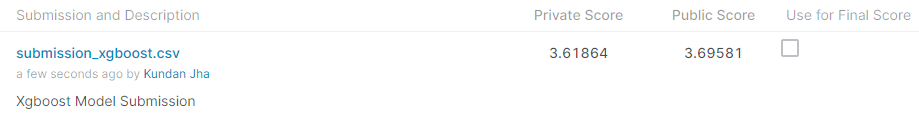

In [ ]:
from IPython.display import Image
print("Score in Kaggle :")
Image("/content/drive/MyDrive/Case study1/Xgboost_Score.png")

**Model : LIGHTGBM**

LightGBM is the first ensemble model build for the predictions. Since, there are so many hyperparameters in the lightbgm model. we are gonna do parameter tuning first to get the better parameters using **OPTUNA**.

**OPTUNA** is a library which internally dedicated to the trials on the data to find the find the best results.

In [ ]:
!pip install optuna

     |████████████████████████████████| 296kB 11.7MB/s 
     |████████████████████████████████| 81kB 5.6MB/s 
     |████████████████████████████████| 163kB 25.3MB/s 
     |████████████████████████████████| 112kB 56.1MB/s 
     |████████████████████████████████| 143kB 30.4MB/s 
     |████████████████████████████████| 51kB 3.6MB/s 
     |████████████████████████████████| 81kB 5.6MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=a407891cab7a2a9225240771e0ff1c88900878273e289ff109725f87e4e1fbdb
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [ ]:
# Reference : https://colab.research.google.com/drive/1I8abciKFXBxkoXrcwLiG7_BrYskLnV8k#scrollTo=8lOM3b6iO3it

# This is a class build for using early stopping in optuna trails
OPTUNE_EARLY_STOPING = 25

class EarlyStoppingExceeded(optuna.exceptions.OptunaError):
    early_stop = OPTUNE_EARLY_STOPING
    early_stop_count = 0
    best_score = None

def early_stopping_opt(study, trial):
    if EarlyStoppingExceeded.best_score == None:
      EarlyStoppingExceeded.best_score = study.best_value

    if study.best_value < EarlyStoppingExceeded.best_score:
        EarlyStoppingExceeded.best_score = study.best_value
        EarlyStoppingExceeded.early_stop_count = 0
    else:
      if EarlyStoppingExceeded.early_stop_count > EarlyStoppingExceeded.early_stop:
            EarlyStoppingExceeded.early_stop_count = 0
            best_score = None
            raise EarlyStoppingExceeded()
      else:
            EarlyStoppingExceeded.early_stop_count=EarlyStoppingExceeded.early_stop_count+1
    print(f'EarlyStop counter: {EarlyStoppingExceeded.early_stop_count}, Best score: {study.best_value} and {EarlyStoppingExceeded.best_score}')
    return

In [ ]:
# Reference : https://medium.com/optuna/lightgbm-tuner-new-optuna-integration-for-hyperparameter-optimization-8b7095e99258

import optuna
import lightgbm
def objective(trial):
    
    # definfing the dataset into the lgb model 
    lgbm_train = lightgbm.Dataset(X_train, y_train, free_raw_data=False)
    
    # defining the params to hypertune and other neccessary parameters 
    params = {
              'objective': 'regression', 'metric': 'rmse',
              'verbosity': -1,  "learning_rate": 0.01,
              'device': 'cpu',  'seed': 326,
              'boosting_type': 'gbdt', 'n_jobs': 8,
              'num_leaves': trial.suggest_int('num_leaves', 16, 64), 'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.001, 1),
              'subsample': trial.suggest_uniform('subsample', 0.001, 1), 'max_depth': trial.suggest_int('max_depth', 1, 12),
              'reg_alpha': trial.suggest_uniform('reg_alpha', 0, 10), 'reg_lambda': trial.suggest_uniform('reg_lambda', 0, 10),
              'min_split_gain': trial.suggest_uniform('min_split_gain', 0, 10), 'min_child_weight': trial.suggest_uniform('min_child_weight', 0, 45),
              'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 16, 64)
              }


    # creating folds so, training and validation can be done in folds of data
    folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=1989)

    # intializing the model for cross vlidation 
    reg = lightgbm.cv(params=params, train_set=lgbm_train, metrics=['rmse'], nfold=3, \
                      folds=folds.split(X_train, outliers.values), \
                      num_boost_round=10000, early_stopping_rounds=200, verbose_eval=False, seed=47)
    
    return reg['rmse-mean'][-1]

In [ ]:
%%time
# intializing the study to optimize
study = optuna.create_study()
# optimize to hyperparmeter tune.
try:
  study.optimize(objective, n_trials=100, callbacks=[early_stopping_opt])
except EarlyStoppingExceeded:
    print(f'EarlyStopping Exceeded: No new best scores on iters {OPTUNE_EARLY_STOPING}')
gc.collect()

[I 2021-04-25 04:37:34,770] A new study created in memory with name: no-name-c2abbd1d-18eb-415f-9dfc-d993192674a4
[I 2021-04-25 04:41:44,877] Trial 0 finished with value: 3.6614290318334146 and parameters: {'num_leaves': 53, 'colsample_bytree': 0.15096690316880232, 'subsample': 0.2854651541593634, 'max_depth': 5, 'reg_alpha': 2.238040648369802, 'reg_lambda': 6.395565059547513, 'min_split_gain': 9.319287372104338, 'min_child_weight': 8.436752224164973, 'min_data_in_leaf': 38}. Best is trial 0 with value: 3.6614290318334146.


EarlyStop counter: 1, Best score: 3.6614290318334146 and 3.6614290318334146


[I 2021-04-25 04:47:42,170] Trial 1 finished with value: 3.663612166201838 and parameters: {'num_leaves': 58, 'colsample_bytree': 0.77491610129177, 'subsample': 0.09169707570153383, 'max_depth': 9, 'reg_alpha': 3.159932679154651, 'reg_lambda': 7.950139428573126, 'min_split_gain': 9.829013840216186, 'min_child_weight': 24.518195829684064, 'min_data_in_leaf': 54}. Best is trial 0 with value: 3.6614290318334146.


EarlyStop counter: 2, Best score: 3.6614290318334146 and 3.6614290318334146


[I 2021-04-25 04:53:00,324] Trial 2 finished with value: 3.6608922223579654 and parameters: {'num_leaves': 56, 'colsample_bytree': 0.5140968957791702, 'subsample': 0.7845536601439868, 'max_depth': 10, 'reg_alpha': 7.83918375218955, 'reg_lambda': 9.479202388683083, 'min_split_gain': 7.525991573259073, 'min_child_weight': 33.084334995154926, 'min_data_in_leaf': 24}. Best is trial 2 with value: 3.6608922223579654.


EarlyStop counter: 0, Best score: 3.6608922223579654 and 3.6608922223579654


[I 2021-04-25 04:56:14,491] Trial 3 finished with value: 3.6665793410734593 and parameters: {'num_leaves': 47, 'colsample_bytree': 0.12505530432261575, 'subsample': 0.6752552918879414, 'max_depth': 4, 'reg_alpha': 6.009305306762011, 'reg_lambda': 2.998281834309726, 'min_split_gain': 7.211438290223507, 'min_child_weight': 27.48173447652145, 'min_data_in_leaf': 34}. Best is trial 2 with value: 3.6608922223579654.


EarlyStop counter: 1, Best score: 3.6608922223579654 and 3.6608922223579654


[I 2021-04-25 05:01:02,285] Trial 4 finished with value: 3.666161486569544 and parameters: {'num_leaves': 38, 'colsample_bytree': 0.09247754460264287, 'subsample': 0.7912021751681365, 'max_depth': 4, 'reg_alpha': 3.022455716238338, 'reg_lambda': 6.44788410367796, 'min_split_gain': 6.303441580069546, 'min_child_weight': 38.92165451203024, 'min_data_in_leaf': 22}. Best is trial 2 with value: 3.6608922223579654.


EarlyStop counter: 2, Best score: 3.6608922223579654 and 3.6608922223579654


[I 2021-04-25 05:05:06,927] Trial 5 finished with value: 3.6588764871821575 and parameters: {'num_leaves': 36, 'colsample_bytree': 0.34115151882216554, 'subsample': 0.5619349253279099, 'max_depth': 9, 'reg_alpha': 5.438626217180353, 'reg_lambda': 4.374793787523627, 'min_split_gain': 4.392583194171862, 'min_child_weight': 26.403080886711948, 'min_data_in_leaf': 29}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 0, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 05:11:03,566] Trial 6 finished with value: 3.6690424153346535 and parameters: {'num_leaves': 49, 'colsample_bytree': 0.9085067744074993, 'subsample': 0.7403619471432517, 'max_depth': 5, 'reg_alpha': 3.048988696950845, 'reg_lambda': 4.707891455068575, 'min_split_gain': 9.358263125961283, 'min_child_weight': 18.743294420320318, 'min_data_in_leaf': 25}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 1, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 05:16:35,379] Trial 7 finished with value: 3.6639568603415706 and parameters: {'num_leaves': 30, 'colsample_bytree': 0.7604414504892926, 'subsample': 0.3149155810370538, 'max_depth': 6, 'reg_alpha': 6.170471648199769, 'reg_lambda': 9.471278983041644, 'min_split_gain': 8.733004757453962, 'min_child_weight': 34.18377997453443, 'min_data_in_leaf': 61}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 2, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 05:22:27,406] Trial 8 finished with value: 3.66778361746673 and parameters: {'num_leaves': 62, 'colsample_bytree': 0.49178019290445535, 'subsample': 0.07626216422307723, 'max_depth': 4, 'reg_alpha': 4.085153932812134, 'reg_lambda': 7.591711720979171, 'min_split_gain': 0.46729535992563576, 'min_child_weight': 1.3388307528219618, 'min_data_in_leaf': 50}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 3, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 05:27:19,818] Trial 9 finished with value: 3.660701341313066 and parameters: {'num_leaves': 31, 'colsample_bytree': 0.42652611911096866, 'subsample': 0.5294432262448651, 'max_depth': 9, 'reg_alpha': 9.57814490119379, 'reg_lambda': 2.681919447654648, 'min_split_gain': 9.904011004074215, 'min_child_weight': 16.836221627908245, 'min_data_in_leaf': 46}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 4, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 05:33:42,119] Trial 10 finished with value: 3.7355998579220877 and parameters: {'num_leaves': 16, 'colsample_bytree': 0.30150202974470164, 'subsample': 0.9601595444730634, 'max_depth': 1, 'reg_alpha': 8.210424091505237, 'reg_lambda': 0.6190161134018508, 'min_split_gain': 2.965248029266997, 'min_child_weight': 42.440796871292534, 'min_data_in_leaf': 32}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 5, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 05:37:40,196] Trial 11 finished with value: 3.6608300302983854 and parameters: {'num_leaves': 28, 'colsample_bytree': 0.4156170131471167, 'subsample': 0.5168616106189577, 'max_depth': 12, 'reg_alpha': 0.1919938773487182, 'reg_lambda': 2.1182695658791677, 'min_split_gain': 3.7230635562851377, 'min_child_weight': 11.403406798330414, 'min_data_in_leaf': 45}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 6, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 05:42:00,503] Trial 12 finished with value: 3.659859102806969 and parameters: {'num_leaves': 31, 'colsample_bytree': 0.30296076014910794, 'subsample': 0.5060407949113281, 'max_depth': 9, 'reg_alpha': 9.193952902909096, 'reg_lambda': 3.7688597773619055, 'min_split_gain': 4.431234352486954, 'min_child_weight': 18.897384692681936, 'min_data_in_leaf': 16}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 7, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 05:46:17,958] Trial 13 finished with value: 3.6612730410200345 and parameters: {'num_leaves': 21, 'colsample_bytree': 0.3514249316577676, 'subsample': 0.3436840607493039, 'max_depth': 12, 'reg_alpha': 8.91434972500558, 'reg_lambda': 4.4888176934798665, 'min_split_gain': 4.455104583168002, 'min_child_weight': 28.40697453596931, 'min_data_in_leaf': 17}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 8, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 05:51:34,083] Trial 14 finished with value: 3.6621760954260707 and parameters: {'num_leaves': 39, 'colsample_bytree': 0.6418080953197811, 'subsample': 0.6151013273871618, 'max_depth': 8, 'reg_alpha': 7.101958946639582, 'reg_lambda': 3.907132403492169, 'min_split_gain': 1.8773693158309221, 'min_child_weight': 18.685640921016137, 'min_data_in_leaf': 16}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 9, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 05:54:58,013] Trial 15 finished with value: 3.6625516595899152 and parameters: {'num_leaves': 22, 'colsample_bytree': 0.2602020567283575, 'subsample': 0.4128962541167551, 'max_depth': 11, 'reg_alpha': 0.6869027850938441, 'reg_lambda': 0.9777421097958312, 'min_split_gain': 5.482024058362354, 'min_child_weight': 11.376286113413906, 'min_data_in_leaf': 29}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 10, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 06:03:30,434] Trial 16 finished with value: 3.694768255146356 and parameters: {'num_leaves': 36, 'colsample_bytree': 0.01928070637569851, 'subsample': 0.9824486934925536, 'max_depth': 7, 'reg_alpha': 9.87027962916482, 'reg_lambda': 5.659931909270299, 'min_split_gain': 2.141744887020662, 'min_child_weight': 22.579501701695815, 'min_data_in_leaf': 16}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 11, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 06:07:16,072] Trial 17 finished with value: 3.659802787499327 and parameters: {'num_leaves': 44, 'colsample_bytree': 0.22542951574898068, 'subsample': 0.23151605719281954, 'max_depth': 10, 'reg_alpha': 5.186156039650376, 'reg_lambda': 3.545840333197028, 'min_split_gain': 5.045071888569397, 'min_child_weight': 1.114869435800152, 'min_data_in_leaf': 20}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 12, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 06:10:53,203] Trial 18 finished with value: 3.662071808878118 and parameters: {'num_leaves': 45, 'colsample_bytree': 0.19233349245255107, 'subsample': 0.1948064480314392, 'max_depth': 11, 'reg_alpha': 4.740402816109901, 'reg_lambda': 1.7023490906580045, 'min_split_gain': 5.665758470961186, 'min_child_weight': 1.053349446546137, 'min_data_in_leaf': 28}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 13, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 06:17:56,249] Trial 19 finished with value: 3.7530578865046027 and parameters: {'num_leaves': 43, 'colsample_bytree': 0.0026762378379811547, 'subsample': 0.02511881675791494, 'max_depth': 8, 'reg_alpha': 5.695391074962113, 'reg_lambda': 5.52818234501411, 'min_split_gain': 6.707118018264001, 'min_child_weight': 6.522847912899943, 'min_data_in_leaf': 38}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 14, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 06:21:58,148] Trial 20 finished with value: 3.6591342076453937 and parameters: {'num_leaves': 35, 'colsample_bytree': 0.21273837209525395, 'subsample': 0.2176504538853509, 'max_depth': 10, 'reg_alpha': 4.514753771582021, 'reg_lambda': 3.3504132446961035, 'min_split_gain': 0.34514918611444667, 'min_child_weight': 31.361302382336465, 'min_data_in_leaf': 21}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 15, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 06:25:53,698] Trial 21 finished with value: 3.6596671758516535 and parameters: {'num_leaves': 35, 'colsample_bytree': 0.21292320250781638, 'subsample': 0.17930152307935437, 'max_depth': 10, 'reg_alpha': 4.906215124499958, 'reg_lambda': 3.4501554481635757, 'min_split_gain': 1.1707247997254044, 'min_child_weight': 31.976334784914375, 'min_data_in_leaf': 21}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 16, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 06:29:57,836] Trial 22 finished with value: 3.6646333021574127 and parameters: {'num_leaves': 35, 'colsample_bytree': 0.08740354088382168, 'subsample': 0.15545937482155406, 'max_depth': 11, 'reg_alpha': 4.382996119040362, 'reg_lambda': 1.9016178095072391, 'min_split_gain': 0.1917236364656263, 'min_child_weight': 33.35008959013583, 'min_data_in_leaf': 28}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 17, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 06:34:27,764] Trial 23 finished with value: 3.6601058509719215 and parameters: {'num_leaves': 24, 'colsample_bytree': 0.381825725272318, 'subsample': 0.012305596386032874, 'max_depth': 10, 'reg_alpha': 6.561207880300787, 'reg_lambda': 2.9501418806117656, 'min_split_gain': 0.6128968953894618, 'min_child_weight': 36.91732275169025, 'min_data_in_leaf': 20}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 18, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 06:37:40,078] Trial 24 finished with value: 3.659304540086858 and parameters: {'num_leaves': 35, 'colsample_bytree': 0.22161655010352216, 'subsample': 0.40318836652294104, 'max_depth': 8, 'reg_alpha': 3.9134232791658743, 'reg_lambda': 4.661767928206491, 'min_split_gain': 1.4888818366257595, 'min_child_weight': 28.108872546183196, 'min_data_in_leaf': 32}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 19, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 06:42:38,293] Trial 25 finished with value: 3.6615036544865336 and parameters: {'num_leaves': 41, 'colsample_bytree': 0.4928555684603394, 'subsample': 0.4221952678359545, 'max_depth': 7, 'reg_alpha': 1.4894507666775567, 'reg_lambda': 5.216837848361974, 'min_split_gain': 3.1649522550844393, 'min_child_weight': 28.476987834847613, 'min_data_in_leaf': 33}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 20, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 06:47:59,802] Trial 26 finished with value: 3.6615601103402327 and parameters: {'num_leaves': 26, 'colsample_bytree': 0.5972616921472556, 'subsample': 0.43034363713032775, 'max_depth': 8, 'reg_alpha': 3.8279061071592793, 'reg_lambda': 4.435653566400095, 'min_split_gain': 1.5528422200091025, 'min_child_weight': 26.01498435547847, 'min_data_in_leaf': 42}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 21, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 06:51:45,908] Trial 27 finished with value: 3.6601084686131244 and parameters: {'num_leaves': 33, 'colsample_bytree': 0.3087210067034242, 'subsample': 0.6488944089619177, 'max_depth': 8, 'reg_alpha': 3.623698904025451, 'reg_lambda': 6.293639079719103, 'min_split_gain': 2.1596482418699114, 'min_child_weight': 42.32980141463913, 'min_data_in_leaf': 35}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 22, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 06:58:35,763] Trial 28 finished with value: 3.6794019446974993 and parameters: {'num_leaves': 41, 'colsample_bytree': 0.02815590181363456, 'subsample': 0.5810207908862541, 'max_depth': 6, 'reg_alpha': 2.0243450543781334, 'reg_lambda': 7.255302659723313, 'min_split_gain': 2.7369079951416864, 'min_child_weight': 31.080153735036838, 'min_data_in_leaf': 30}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 23, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 07:02:09,326] Trial 29 finished with value: 3.660349880999343 and parameters: {'num_leaves': 50, 'colsample_bytree': 0.16448283813030914, 'subsample': 0.2678237297356884, 'max_depth': 9, 'reg_alpha': 5.377899931123256, 'reg_lambda': 6.2546061581370305, 'min_split_gain': 0.08094828200687232, 'min_child_weight': 38.36394541048698, 'min_data_in_leaf': 37}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 24, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 07:06:22,037] Trial 30 finished with value: 3.658939251666677 and parameters: {'num_leaves': 38, 'colsample_bytree': 0.26227760709068926, 'subsample': 0.3678076442905798, 'max_depth': 7, 'reg_alpha': 2.3502313528278926, 'reg_lambda': 4.19337943662525, 'min_split_gain': 0.986969601563582, 'min_child_weight': 22.79030179612351, 'min_data_in_leaf': 25}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 25, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 07:10:29,407] Trial 31 finished with value: 3.6595513458921967 and parameters: {'num_leaves': 37, 'colsample_bytree': 0.2674501497621873, 'subsample': 0.3743865117868169, 'max_depth': 7, 'reg_alpha': 2.3184749775335534, 'reg_lambda': 4.507851411918723, 'min_split_gain': 0.9912729084997594, 'min_child_weight': 23.117016401273972, 'min_data_in_leaf': 25}. Best is trial 5 with value: 3.6588764871821575.


EarlyStop counter: 26, Best score: 3.6588764871821575 and 3.6588764871821575


[I 2021-04-25 07:14:09,058] Trial 32 finished with value: 3.6612099490454213 and parameters: {'num_leaves': 33, 'colsample_bytree': 0.1375645751539455, 'subsample': 0.2906376213167353, 'max_depth': 6, 'reg_alpha': 2.3756905541297826, 'reg_lambda': 3.9616278897282835, 'min_split_gain': 0.0004193602305920807, 'min_child_weight': 29.050346921824072, 'min_data_in_leaf': 26}. Best is trial 5 with value: 3.6588764871821575.


EarlyStopping Exceeded: No new best scores on iters 25
CPU times: user 4h 12min 49s, sys: 27min 6s, total: 4h 39min 56s
Wall time: 2h 36min 34s


In [ ]:
# printing the best parameters got from optuna framework.
print('Best trial:')
besttrial = study.best_trial
gc.collect()

for key, value in besttrial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
    num_leaves: 52
    colsample_bytree: 0.16303273910513075
    subsample: 0.32760140991869685
    max_depth: 7
    reg_alpha: 7.142250597347614
    reg_lambda: 5.270006900736606
    min_split_gain: 9.73107747881212
    min_child_weight: 8.304114965426745
    min_data_in_leaf: 20


**LIGHTGBM with best hyperparameters :**

In [ ]:
%%time
param =  {           
                    'objective'         : 'regression',
                    'boosting_type'     : 'gbdt',
                    'metric'            : 'rmse',
                    'num_leaves'        : 52,
                    'colsample_bytree'  : 0.16303273910513075,
                    'subsample'         : 0.32760140991869685,
                    'max_depth'         : 7,
                    'reg_alpha'         : 7.142250597347614,
                    'reg_lambda'        : 5.270006900736606,
                    'min_split_gain'    : 9.73107747881212,
                    'min_child_weight'  : 8.304114965426745,
                    'min_data_in_leaf'  : 20,
                    'learning_rate'     : 0.01,
                    'data_random_seed'  : 2019,
                    'max_bin'           : 255,
                    'nthread'           : 8
                }

predictions_lgb_train = np.zeros(len(X_train))
predictions_lgb_test = np.zeros(len(test))

# prepare fit model with cross-validation
folds = StratifiedKFold(n_splits=9, shuffle=True, random_state=1989)

# run model
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train,outliers.values)):

    print("fold {}".format(fold_))
    trn_data = lightgbm.Dataset(X_train.iloc[trn_idx], \
                           label=y_train.iloc[trn_idx])
    val_data = lightgbm.Dataset(X_train.iloc[val_idx], \
                           label=y_train.iloc[val_idx])

    num_round = 10000
    
    # intializing the model
    clf = lightgbm.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], \
                    verbose_eval=200, early_stopping_rounds = 150)
    
    # prediction of the train data
    predictions_lgb_train[val_idx] = clf.predict(X_train.iloc[val_idx], num_iteration=clf.best_iteration)
    
    # prediction on test data
    predictions_lgb_test += clf.predict(test, num_iteration=clf.best_iteration) / folds.n_splits
    


fold 0
Training until validation scores don't improve for 150 rounds.
[200]	training's rmse: 3.63455	valid_1's rmse: 3.68718
[400]	training's rmse: 3.55505	valid_1's rmse: 3.66601
[600]	training's rmse: 3.50576	valid_1's rmse: 3.65931
[800]	training's rmse: 3.46732	valid_1's rmse: 3.65622
[1000]	training's rmse: 3.43601	valid_1's rmse: 3.65427
[1200]	training's rmse: 3.40649	valid_1's rmse: 3.65285
[1400]	training's rmse: 3.37764	valid_1's rmse: 3.65259
[1600]	training's rmse: 3.35204	valid_1's rmse: 3.6527
Early stopping, best iteration is:
[1458]	training's rmse: 3.37098	valid_1's rmse: 3.65225
fold 1
Training until validation scores don't improve for 150 rounds.
[200]	training's rmse: 3.63952	valid_1's rmse: 3.6529
[400]	training's rmse: 3.56138	valid_1's rmse: 3.62879
[600]	training's rmse: 3.5122	valid_1's rmse: 3.62224
[800]	training's rmse: 3.47264	valid_1's rmse: 3.6191
[1000]	training's rmse: 3.43952	valid_1's rmse: 3.61717
[1200]	training's rmse: 3.41005	valid_1's rmse: 3.616

In [ ]:
# RMSE score for lightgbm model
print(np.sqrt(mean_squared_error(predictions_lgb_train, y_train)))

3.651775116754779


**Observation :** This is an improvment from the xgboost score, from 3.657 to 3.651.

In [ ]:
# saving the predcitions 
np.save('predictions_lgbm_train.npy', predictions_lgb_train)
np.save('predictions_lgbm_test.npy', predictions_lgb_test)

In [ ]:
!cp predictions_lgbm_train.npy "/content/drive/MyDrive/Case study1"
!cp predictions_lgbm_test.npy "/content/drive/MyDrive/Case study1"

In [ ]:
import pickle
# saving the model
pickle.dump(clf, open('/content/drive/MyDrive/Case study1/lgbm_model_final.sav', 'wb'))

In [ ]:
submit_df = pd.read_csv('/content/sample_submission.csv')
submit_df["target"] = predictions_lgb_test
submit_df.to_csv("submission_lgbm1.csv", index=False)
submit_df.head()

,card_id,target
0,C_ID_0ab67a22ab,-2.653226
1,C_ID_130fd0cbdd,-0.252998
2,C_ID_b709037bc5,-0.943156
3,C_ID_d27d835a9f,-0.091992
4,C_ID_2b5e3df5c2,-1.409997


Score in Kaggle :


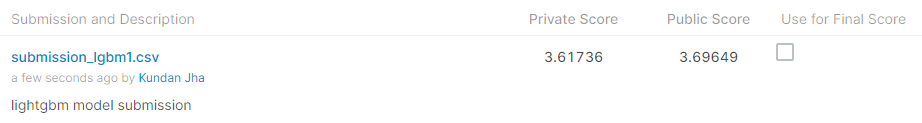

In [ ]:
from IPython.display import Image
print("Score in Kaggle :")
Image("/content/drive/MyDrive/Case study1/lgbm_score.png")

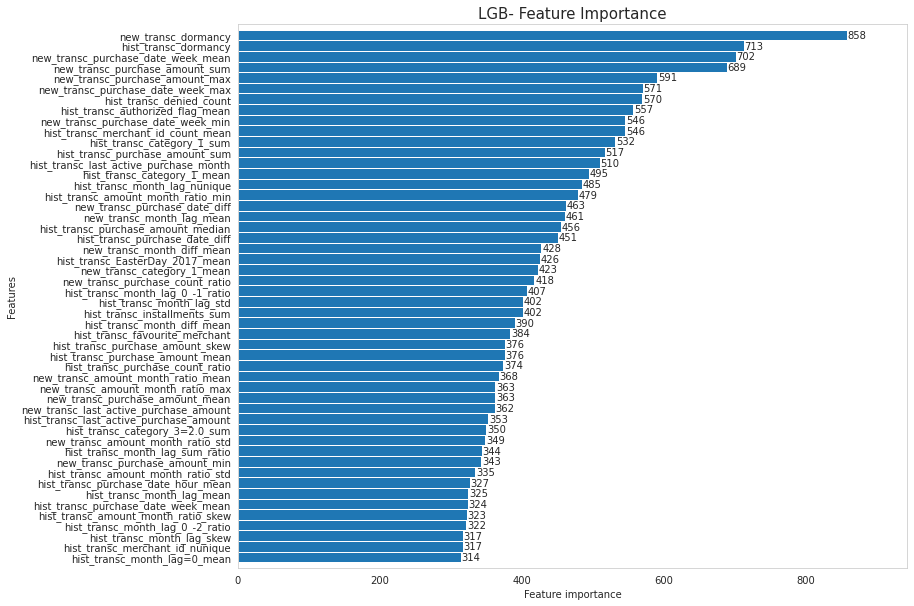

In [ ]:
# Feature Importance
import lightgbm 
fig, ax = plt.subplots(figsize=(12,10))
lightgbm.plot_importance(clf, max_num_features=50, height=1, ax=ax)
ax.grid(False)
plt.title("LGB- Feature Importance", fontsize=15);

**Model : ADABOOST**

**Preparing data :**

Adaboost is not compatible with missing values in data, Dropping them is not a wise idea. So, I impute them.

I just picked a strategy to replace missing data with the mean, using the SimpleImputer class.

In [ ]:
%%time
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(train)
train = imp.transform(train)

CPU times: user 438 ms, sys: 800 µs, total: 439 ms
Wall time: 437 ms


In [ ]:
# printing columns with missing values
train.columns[train.isna().any()].tolist()

[]

In [ ]:
%%time
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(train)
test = imp.transform(test)

CPU times: user 438 ms, sys: 800 µs, total: 439 ms
Wall time: 437 ms


In [ ]:
# printing columns with missing values
test.columns[test.isna().any()].tolist()

[]

In [ ]:
# splitting train and target values
y_train = train['target']

X = train.drop(['target'],axis=1)

outliers = X['outliers']

X_train = X.drop(['outliers'],axis = 1)

Hyperparameter tuning using **RandomizedSearchCV :**

In [ ]:
%%time
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold

# intializing the model
ada = AdaBoostRegressor(base_estimator=None, loss='square', random_state=1989)

# intializing the parameters
parameters = {
	'n_estimators': [i for i in range(10,101,10)],
    'learning_rate': [1e-3,1e-2, 0.1, 1],
    }

folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=1989)

# initializing RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=ada, param_distributions=parameters, cv=folds.split(X_train,outliers.values), n_iter=30, n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 65.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 155.5min finished


CPU times: user 2min 13s, sys: 4.43 s, total: 2min 18s
Wall time: 2h 36min 54s


In [ ]:
# printing the best parameters got from the RandomizedSearchCV.
random_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 20}

**ADABOOST with best hyperparameters :**

In [ ]:
%%time
predictions_ada_train = np.zeros(X_train.shape[0])
predictions_ada_test = np.zeros(test.shape[0])

# prepare fit model with cross-validation
FOLDs = KFold(n_splits=9, shuffle=True, random_state=1989)

for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(X_train,outliers.values)):
    print("Starting fold n={}".format(fold_))
    trn_data, trn_y = X_train.iloc[trn_idx], y_train.iloc[trn_idx].values
    val_data, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx].values
    
    # intializing the regressor
    ada_model = AdaBoostRegressor(n_estimators=20, learning_rate=0.01, loss='square', random_state=1989)
    ada_model.fit(trn_data, trn_y)
    
    # prediction on train data
    predictions_ada_train[val_idx] = ada_model.predict(val_data)
    
    # prediction on test data
    predictions_ada_test = predictions_ada_test + ada_model.predict(test) / FOLDs.n_splits




Starting fold n=0
Starting fold n=1
Starting fold n=2
Starting fold n=3
Starting fold n=4
Starting fold n=5
Starting fold n=6
Starting fold n=7
Starting fold n=8
CPU times: user 17min 35s, sys: 1.83 s, total: 17min 37s
Wall time: 17min 34s


In [ ]:
# RMSE score for Xgboost model
print(np.sqrt(mean_squared_error(predictions_ada_train, y_train)))

3.756198369541227


**Observation :** This is the maximum rmse we have got till now, Even greater than baseline model(3.72).

In [ ]:
submit_df = pd.read_csv('/content/sample_submission.csv')
submit_df["target"] = predictions_ada_test
submit_df.to_csv("submission_adaboost_final.csv", index=False)
submit_df.head()

,card_id,target
0,C_ID_0ab67a22ab,-5.002411
1,C_ID_130fd0cbdd,-0.196620
2,C_ID_b709037bc5,-0.691394
3,C_ID_d27d835a9f,-0.198437
4,C_ID_2b5e3df5c2,-0.692473


Score in Kaggle :


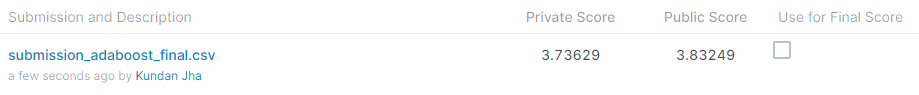

In [ ]:
from IPython.display import Image
print("Score in Kaggle :")
Image("/content/drive/MyDrive/Case study1/Adaboost_Score.png")

**Model : MLP Architecture (Neural Network based Models)**

**Sequential Model** with 5 Layer and Dropout :

In [ ]:
from keras import backend as K
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from keras.layers import Dense, Dropout, BatchNormalization

# initialization of loss
def root_mean_squared_error(y_true, y_prediction):
        return K.sqrt(K.mean(K.square(y_prediction - y_true)))

# callback for model
early_stop = keras.callbacks.EarlyStopping(monitor='loss',patience=5, restore_best_weights=True, verbose=1, mode='auto')

mlp_model = Sequential()
mlp_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dropout(0.25))
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dense(8, activation='relu'))
mlp_model.add(Dense(1))

mlp_model.compile(loss=root_mean_squared_error, optimizer="adam")

In [ ]:
mlp_model.fit(X_train, y_train, batch_size=64, epochs=50, verbose=1, callbacks=[early_stop])

Epoch 1/50
3155/3155 [==============================] - 13s 3ms/step - loss: 3.4402
Epoch 2/50
3155/3155 [==============================] - 10s 3ms/step - loss: 3.3907
Epoch 3/50
3155/3155 [==============================] - 10s 3ms/step - loss: 3.4381
Epoch 4/50
3155/3155 [==============================] - 10s 3ms/step - loss: 3.4222
Epoch 5/50
3155/3155 [==============================] - 10s 3ms/step - loss: 3.3478
Epoch 6/50
3155/3155 [==============================] - 10s 3ms/step - loss: 3.4042
Epoch 7/50
3155/3155 [==============================] - 10s 3ms/step - loss: 3.3779
Epoch 8/50
3155/3155 [==============================] - 10s 3ms/step - loss: 3.4489
Epoch 9/50
3155/3155 [==============================] - 10s 3ms/step - loss: 3.4235
Restoring model weights from the end of the best epoch.
Epoch 00009: early stopping


In [ ]:
pred_mlp = mlp_model.predict(test)
submit_df = pd.read_csv('/content/sample_submission.csv')
submit_df["target"] = pred_mlp
submit_df.to_csv("submission_sequential.csv", index=False)

Score in Kaggle :


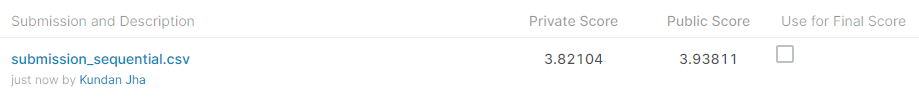

In [ ]:
from IPython.display import Image
print("Score in Kaggle :")
Image("/content/drive/MyDrive/Case study1/Sequential_Score.png")

**Model : Convolutional Model** 

In [ ]:
from keras.layers import Conv1D, Flatten, MaxPooling1D

# initialization of loss
def root_mean_squared_error(y_true, y_prediction):
        return K.sqrt(K.mean(K.square(y_prediction - y_true)))

# callback for model
early_stop = keras.callbacks.EarlyStopping(monitor='loss',patience=5, restore_best_weights=True, verbose=1, mode='auto')
       
conv_model = Sequential()
conv_model.add(Conv1D(128, 2, activation="relu", input_shape=(197, 1)))
conv_model.add(Conv1D(64, 2, activation='relu'))
conv_model.add(MaxPooling1D(pool_size=2))
conv_model.add(Dropout(0.5))
conv_model.add(Conv1D(32, 2, activation='relu'))
conv_model.add(MaxPooling1D(pool_size=2))
conv_model.add(Dropout(0.25))
conv_model.add(Flatten())
conv_model.add(Dense(16, activation="relu"))
conv_model.add(Dense(1))

conv_model.compile(optimizer="adam", loss=root_mean_squared_error)

In [ ]:
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
test = test.values.reshape(test.shape[0], test.shape[1], 1)

In [ ]:
conv_model.fit(X_train, y_train, batch_size=64, epochs=50, callbacks=[early_stop])

Epoch 1/50
3155/3155 [==============================] - 18s 5ms/step - loss: 7.2615
Epoch 2/50
3155/3155 [==============================] - 16s 5ms/step - loss: 3.3724
Epoch 3/50
3155/3155 [==============================] - 16s 5ms/step - loss: 3.4506
Epoch 4/50
3155/3155 [==============================] - 16s 5ms/step - loss: 3.3666
Epoch 5/50
3155/3155 [==============================] - 16s 5ms/step - loss: 3.3743
Epoch 6/50
3155/3155 [==============================] - 16s 5ms/step - loss: 3.3732
Epoch 7/50
3155/3155 [==============================] - 16s 5ms/step - loss: 3.3769
Restoring model weights from the end of the best epoch.
Epoch 00007: early stopping


In [ ]:
pred_cnn = model.predict(test)
submit_df = pd.read_csv('/content/sample_submission.csv')
submit_df["target"] = pred_cnn
submit_df.to_csv("submission_cnn.csv", index=False)

Score in Kaggle :


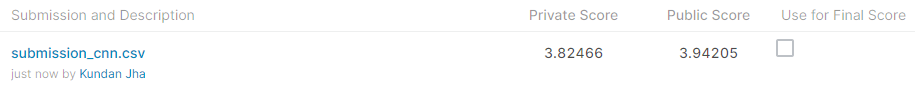

In [ ]:
from IPython.display import Image
print("Score in Kaggle :")
Image("/content/drive/MyDrive/Case study1/CNN_Score.png")

**Observation :**The performance of both the deep learning based models that I have tried are not good enough as compared to the previous models.

**STACKING : Ridge regression as meta learner :**

For Improvement in score I have tried Stacking with meta learner. It can be understood as another ensemble method which can be used for building model on top of the predictions.

For meta learner, usually ridge regression model is preffered because it implements l2 regularization implicitly due to which model is prone to overfitting.


**Hyperparameter Tuning :**

In [ ]:
# loading the predictions of the trained lgb and xgb models to feed as the input to the meta learner
pred_lgb_train = np.load('/content/drive/MyDrive/Case study1/predictions_lgbm_train.npy')
pred_lgb_test = np.load('/content/drive/MyDrive/Case study1/predictions_lgbm_test.npy')
pred_xgb_train = np.load('/content/drive/MyDrive/Case study1/predictions_xgb_train.npy')
pred_xgb_test = np.load('/content/drive/MyDrive/Case study1/predictions_xgb_test.npy')

# definfing the data
train_stack = np.vstack([pred_xgb_train, pred_lgb_train]).transpose()
test_stack = np.vstack([pred_xgb_test, pred_lgb_test]).transpose()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# intializing the ridge regressor
ridge_reg = Ridge()

# defining hyperparameters
stack_params = {'alpha': np.array([1,0.1,0.01,0.001,0.0001,0])}

# initializing GridSearchCV
grid_search = GridSearchCV(ridge_reg,param_grid= stack_params, n_jobs = -1, verbose = 1)

grid_search.fit(meta_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# best alpha for ridge regression
grid_search.best_estimator_

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

**Training with best hyperparameter :**

In [ ]:
predictions_stacked_train = np.zeros(train_stack.shape[0])
predictions_stacked_test = np.zeros(test_stack.shape[0])

# prepare fit model with cross-validation
FOLDs = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)

for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(train_stack, outliers.values)):
    print("Starting fold n={}".format(fold_))
    trn_data, trn_y = train_stack[trn_idx], y_train.iloc[trn_idx].values
    val_data, val_y = train_stack[val_idx], y_train.iloc[val_idx].values

    # intializing the regressor
    ridge_reg = Ridge(alpha=1)
    ridge_reg.fit(trn_data, trn_y)

    # prediction on train data
    predictions_stacked_train[val_idx] = ridge_reg.predict(val_data)
    # prediction on test data
    predictions_stacked_test = predictions_stacked_test + ridge_reg.predict(test_stack) / FOLDs.n_splits


Starting fold n=0
Starting fold n=1
Starting fold n=2
Starting fold n=3
Starting fold n=4
CPU times: user 167 ms, sys: 106 ms, total: 273 ms
Wall time: 156 ms


In [ ]:
# RMSE score for stacked model
print(np.sqrt(mean_squared_error(predictions_stacked_train, y_train)))

3.650222636421724


**Observation :** This is an improvment from the lgbm score, from 3.651 to 3.650.

In [ ]:
submit_df = pd.read_csv('/content/sample_submission.csv')
submit_df["target"] = predictions_stacked_test
submit_df.to_csv("submission_stack_final.csv", index=False)
submit_df.head()

,card_id,target
0,C_ID_0ab67a22ab,-2.885044
1,C_ID_130fd0cbdd,-0.204077
2,C_ID_b709037bc5,-0.958073
3,C_ID_d27d835a9f,-0.055794
4,C_ID_2b5e3df5c2,-1.444786


In [ ]:
import pickle
# saving the model 
pickle.dump(clf, open('/content/drive/MyDrive/Case study1/stacked_model_final.sav', 'wb'))

Score in Kaggle :


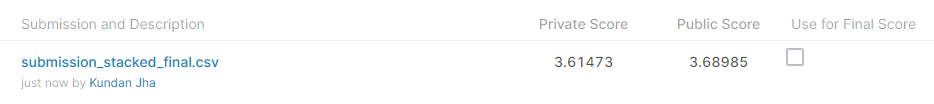

In [ ]:
from IPython.display import Image
print("Score in Kaggle :")
Image("/content/drive/MyDrive/Case study1/FinalStack_Score.png")

**Summary of model scores over kaggle :** 

In [ ]:
from prettytable import PrettyTable

table = PrettyTable()

table.field_names = ["Models", "Private Score", "Public Score"]

table.add_row(["Baseline Model\n", 3.68484, 3.77008]) 
table.add_row(["Xgboost Model\n", 3.61864, 3.69581])
table.add_row(["lightgbm Model\n", 3.61736, 3.69649])
table.add_row(["Adaboost Model\n", 3.73629, 3.83249])
table.add_row(["MLP with 5 layers\n", 3.82104, 3.93811])
table.add_row(["Convolution-1D Model\n", 3.82466, 3.94205])
table.add_row(["Stacking(Ridge metalearner) ", 3.61473, 3.68985])

print(table)

+------------------------------+---------------+--------------+
|            Models            | Private Score | Public Score |
+------------------------------+---------------+--------------+
|        Baseline Model        |    3.68484    |   3.77008    |
|                              |               |              |
|        Xgboost Model         |    3.61864    |   3.69581    |
|                              |               |              |
|        lightgbm Model        |    3.61736    |   3.69649    |
|                              |               |              |
|        Adaboost Model        |    3.73629    |   3.83249    |
|                              |               |              |
|      MLP with 5 layers       |    3.82104    |   3.93811    |
|                              |               |              |
|     Convolution-1D Model     |    3.82466    |   3.94205    |
|                              |               |              |
| Stacking(Ridge metalearner)  |    3.61

**Conclusion :**

* Starting with the baseline model, it does a pretty decent job in terms of score and set a fair boundry to compete with other models. I have got 3.68484 as score over kaggle. This is because, in baseline mode I have included some crucial features with some feature engineering hack.

* Talking about feature engineering, I have prepared my data with 195 features for training and prediction.

* In initial phase of modelling I have tried simple models like linear regression but their performance are not comparable to others and they give even more rmse then baseline model. So. I did not include them in notebook.

* Then I tried XGBOOST, the hyperparameters are tuned using the RandomSearchCV. The XGB model gives a score of 3.61864 which is a huge improvement over my baseline model.

* Then I tried LGBM with all the features and I got a score of around 3.61736. This is a slight improvement from the last model and currently the best in terms of score.

* Talking about feature importance, I am glad to see that the dormancy feature is still the top feature (which i have also included in baseline model) followed by aggregation fetures for purchase_date and purchase_amount.

* Tried Adaboost, the hyperparameters are tuned using the RandomSearchCV. The XGB model gives a score of 3.73629.  This is the maximum rmse we have got till now, Even greater than baseline model(3.72). So, Adaboost performance is not considerable.

* Then tried neural network based architectures like 5 layer MLP, and Convolution model but their performance are not comparable to others.

* Lastly, I have used Stacking with meta learner for building model on top of our two best predictions models(Xgboost, Lightgbm). For meta learner, I preffered Ridge regression as it is prone to overfitting because it implements l2 regularisation implictly. This technique works and I got decent jump on score and landed with 3.61473. This is the best score I got for predictions of loyality Score.
